In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd '/content/drive/My Drive/Masters_Project/Datasets/new1'

/content/drive/My Drive/Masters_Project/Datasets/new1


In [ ]:
#!git clone https://github.com/tSchlegl/f-AnoGAN.git

pip install split_folders

import split-folders

input_folder = "input_path"

output = "output_path" #where you want the split datasets saved. one will be created if none is set

split_folders.ratio('input_folder', output="output", seed=42, ratio=(.8, .1, .1)) 

Convert jpg to png using PIL

Remove jpg images from all dirs

TODO: Chunk the MRI images into 64*64 images

# f-anoGan-TF
Input: MNIST 28 * 28 * 1 images from https://github.com/YeongHyeon/f-AnoGAN-TF/blob/master/source/datamanager.py

https://github.com/Xiaohui9607/f_anogan_pytorch

In [70]:
!pwd

/notebook/modme_kaggle_tumor_detection


In [ ]:
# pip install --user gast==0.2.2

In [1]:
import tensorflow as tf

In [2]:
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
x_tr.shape

(60000, 28, 28)

In [4]:
y_tr.shape

(60000,)

# Reshape all images in the kaggle tumor dataset folder to be same dimensions
Use fastai augmentations and output images to respective folders

512 * 512

In [44]:
import glob
yes_files = glob.glob('./brain_tumor_dataset/yes/*')
no_files = glob.glob('./brain_tumor_dataset/no/*')

In [46]:
# https://stackoverflow.com/questions/273946/how-do-i-resize-an-image-using-pil-and-maintain-its-aspect-ratio
# https://docs.fast.ai/vision.augment.html
import os, sys
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

size = 512, 512

def save_resized_images(file_paths_list, output_relative_path):
  for infile in file_paths_list:
    #outfile = os.path.splitext(infile)[0] + ".jpeg"
    filename = os.path.basename(infile)
    outfile = output_relative_path + filename
    print(outfile)
    if infile != outfile:
        try:
            im = Image.open(infile)
            #im.thumbnail(size, Image.ANTIALIAS)
            im = im.resize(size)
            #print(outfile)
            im.save(outfile, "JPEG")
        except IOError:
            print ("cannot create thumbnail for '%s'" % infile)

In [47]:
save_resized_images(yes_files, "./brain_tumor_dataset/resized_yes/")
save_resized_images(no_files, "./brain_tumor_dataset/resized_no/")

./brain_tumor_dataset/resized_yes/Y1.jpg
./brain_tumor_dataset/resized_yes/Y10.jpg
./brain_tumor_dataset/resized_yes/Y100.JPG
./brain_tumor_dataset/resized_yes/Y101.jpg
./brain_tumor_dataset/resized_yes/Y102.jpg
./brain_tumor_dataset/resized_yes/Y103.jpg
./brain_tumor_dataset/resized_yes/Y104.jpg
./brain_tumor_dataset/resized_yes/Y105.jpg
./brain_tumor_dataset/resized_yes/Y106.jpg
./brain_tumor_dataset/resized_yes/Y107.jpg
./brain_tumor_dataset/resized_yes/Y108.jpg
./brain_tumor_dataset/resized_yes/Y109.JPG
./brain_tumor_dataset/resized_yes/Y11.jpg
./brain_tumor_dataset/resized_yes/Y111.JPG
./brain_tumor_dataset/resized_yes/Y112.JPG
./brain_tumor_dataset/resized_yes/Y113.JPG
./brain_tumor_dataset/resized_yes/Y114.JPG
./brain_tumor_dataset/resized_yes/Y115.JPG
./brain_tumor_dataset/resized_yes/Y116.JPG
./brain_tumor_dataset/resized_yes/Y117.JPG
./brain_tumor_dataset/resized_yes/Y12.jpg
./brain_tumor_dataset/resized_yes/Y120.JPG
./brain_tumor_dataset/resized_yes/Y13.jpg
./brain_tumor_dat

In [ ]:
#save_resized_images(no_files, "./kaggle_tumor_detection/resized_no/")

In [86]:
!ls ./kaggle_tumor_detection/

ls: cannot access './kaggle_tumor_detection/': No such file or directory


In [3]:
resized_yes_files = glob.glob('./brain_tumor_dataset/resized_yes/*')
resized_no_files = glob.glob('./brain_tumor_dataset/resized_no/*')

In [ ]:
#https://www.kaggle.com/anisayari/simple-data-augmentation-fastai

In [16]:
!pip install fastai==1.0.61

     |████████████████████████████████| 239 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 469 kB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 8.8 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19191 sha256=a3e0a9478cae3965526e726f2338892ae201a2f47ba8851552ff3a62c435d343
  Stored in directory: /root/.cache/pip/wheels/7f/26/a3/33f2079871e2bebb3f53a2b21c3ec64129b8efdd18a6263a52
  Created wheel for bottleneck: filename=Bottleneck-1.3.2-cp36-cp36m-linux_x86_64.whl size=330917 sha256=df45db824169f1aec60075922589c737487b06f1dcff22d8e11a7267cd50d544
  Stored in directory: /root/.cache/pip/wheels/f7/a7/14/9be836efed01ac0eb3c125ac006c143b55ebf689269877d0e8
Successfully built nvidia-ml-py3 bottleneck
  Attem

In [17]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
import matplotlib.pyplot as plt

[autoreload of fastai.vision failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.6/dist-packages/fastai/vision/__init__.py", line 12, in <module>
    __all__ = [*basics.__all__, *learner.__all__, *data.__all__, *image.__all__, *transform.__all__, *tta.__all__, 'models', 'vision']
NameEr

In [19]:
def get_img(img_path): 
  return open_image(img_path)

In [20]:
def plots_of_one_image(img_path, tfms, rows=1, cols=3, width=15, height=5, **kwargs):
    img = get_img(img_path)
    [img.apply_tfms(tfms, **kwargs).show(ax=ax) 
     for i,ax in enumerate(plt.subplots(rows,cols,figsize=(width,height))[1].flatten())]    

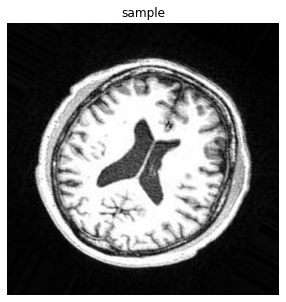

In [23]:
rows=1
cols=3
width=15
height=5
tfms = [rotate(degrees=(-30,30), p=1.0)]
img = get_img(resized_no_files[100])
img.apply_tfms(tfms, padding_mode='border').show(figsize=(10,5), title='sample')


Look at first few images

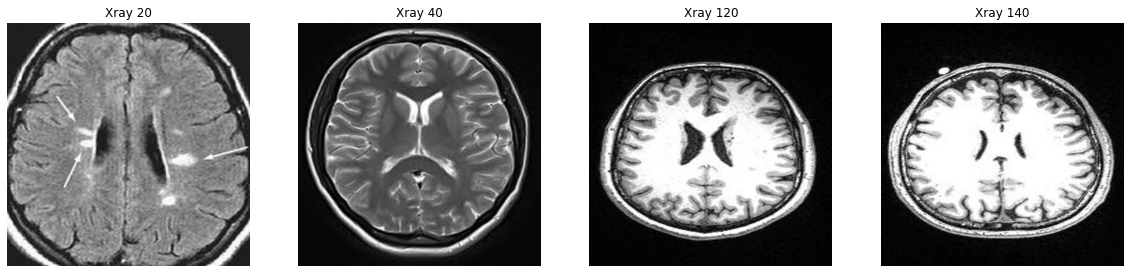

In [26]:
_,axs = plt.subplots(1,4,figsize=(20,10))
for (i,ax),(img_,j) in zip(enumerate(axs),[(get_img(resized_no_files[j]),j) 
                                           for j in [20,40,120,140]]):
    img_.show(ax=ax, title=f'Xray {j}')

padding_mode = "border"

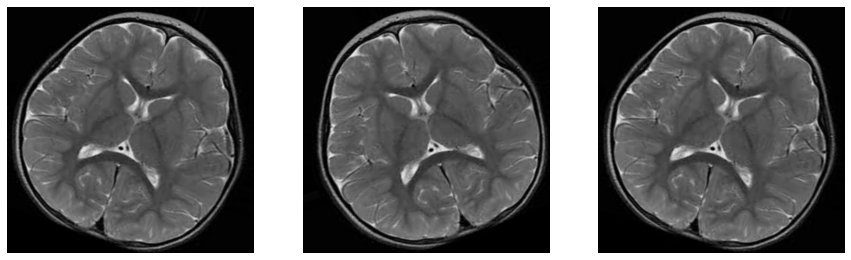

In [27]:
tfms = [rotate(degrees=(-30,30), p=1.0)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='border')

padding_mode = "reflection"

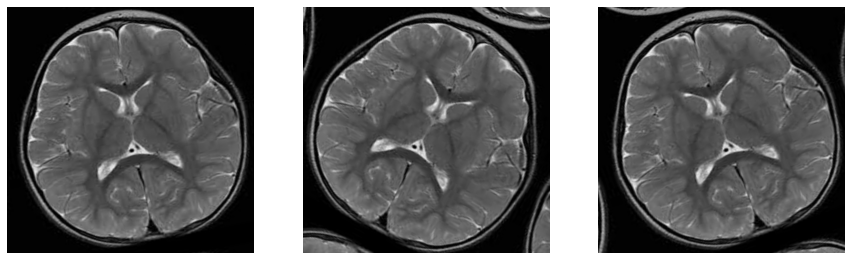

In [28]:
tfms = [rotate(degrees=(-30,30), p=1.0)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='reflection')

Brightness

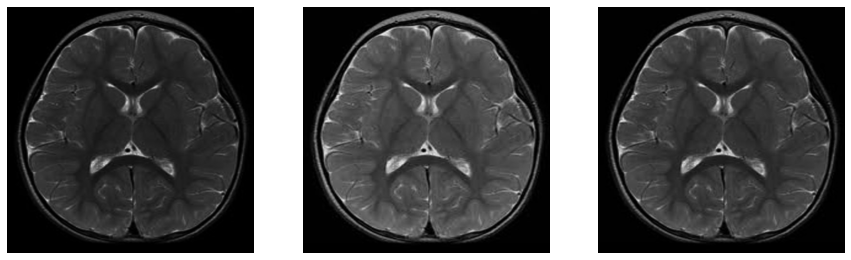

In [29]:
tfms = [brightness(change=(0.1, 0.9))]
plots_of_one_image(resized_no_files[30],tfms)

Contrast

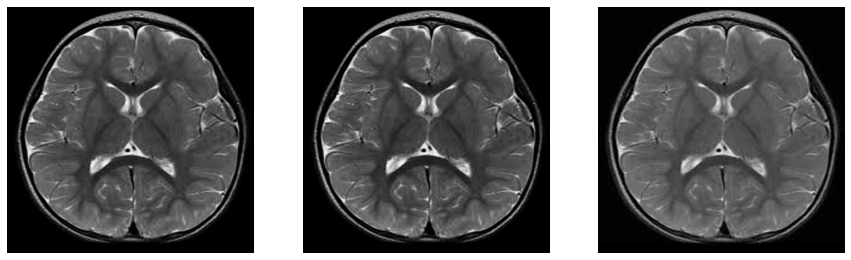

In [30]:
tfms = [contrast(scale=(0.5, 2.), p=1.)]
plots_of_one_image(resized_no_files[30],tfms)

Jitter

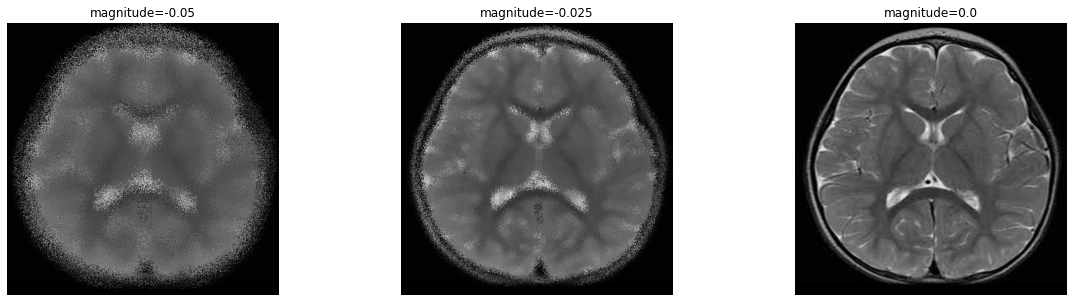

In [31]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
for magnitude, ax in zip(np.linspace(-0.05,0.05,5), axs):
    tfms = [jitter(magnitude=magnitude, p=1.)]
    get_img(resized_no_files[30]).apply_tfms(tfms).show(ax=ax,title="magnitude={}".format(magnitude))

Perspective

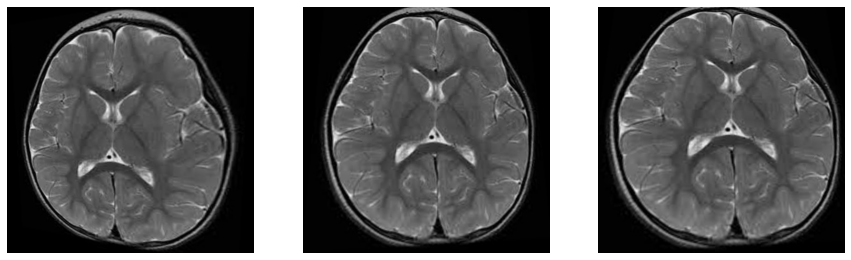

In [32]:
tfms = [symmetric_warp(magnitude=(-0.2,0.2), p=1.)]
plots_of_one_image(resized_no_files[30],tfms,padding_mode='zeros')

Zoom

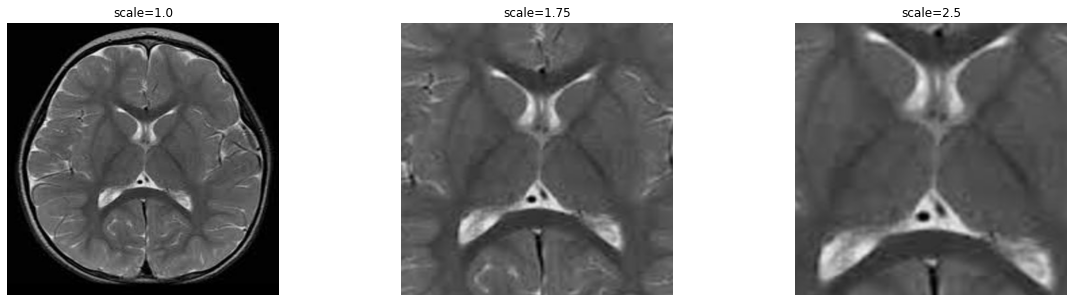

In [33]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
for scale, ax in zip(np.linspace(1.,2.5,3), axs):
    tfms = [zoom(scale=scale, p=1.)]
    get_img(resized_no_files[30]).apply_tfms(tfms).show(ax=ax,title='scale={}'.format(scale))

# Augment and save resized images

In [39]:
#resized_yes_files

def augment_and_save(files_list, tfms, tfm_name, **kwargs):
  file_num = 0
  for f in files_list:
    try:
        save_path = os.path.splitext(f)[0] + "_" + tfm_name + "_" + str(file_num) + "_" + ".jpg"
        print(save_path)
        #save_augmentation(f, tfms, save_path, **kwargs)
        img = get_img(f)
        if kwargs == None:
          img.apply_tfms(tfms).save(save_path)
        else:
          img.apply_tfms(tfms, **kwargs).save(save_path)
        #img.save(save_path)
        #img.show(figsize=(10,5), title='sample')
        file_num += 1
    except:
        pass


In [35]:
# Rotate
tfms = [rotate(degrees=(-30,30), p=1.0)]
augment_and_save(resized_yes_files, tfms, "rotate", padding_mode='border')
#print("====")
augment_and_save(resized_no_files, tfms, "rotate", padding_mode='border')

./brain_tumor_dataset/resized_yes/Y1_rotate_0_.jpg
./brain_tumor_dataset/resized_yes/Y10_rotate_1_.jpg
./brain_tumor_dataset/resized_yes/Y100_rotate_2_.jpg
./brain_tumor_dataset/resized_yes/Y101_rotate_3_.jpg
./brain_tumor_dataset/resized_yes/Y102_rotate_4_.jpg
./brain_tumor_dataset/resized_yes/Y103_rotate_5_.jpg
./brain_tumor_dataset/resized_yes/Y104_rotate_6_.jpg
./brain_tumor_dataset/resized_yes/Y105_rotate_7_.jpg
./brain_tumor_dataset/resized_yes/Y106_rotate_8_.jpg
./brain_tumor_dataset/resized_yes/Y107_rotate_9_.jpg
./brain_tumor_dataset/resized_yes/Y108_rotate_10_.jpg
./brain_tumor_dataset/resized_yes/Y109_rotate_11_.jpg
./brain_tumor_dataset/resized_yes/Y11_rotate_12_.jpg
./brain_tumor_dataset/resized_yes/Y111_rotate_13_.jpg
./brain_tumor_dataset/resized_yes/Y112_rotate_14_.jpg
./brain_tumor_dataset/resized_yes/Y113_rotate_15_.jpg
./brain_tumor_dataset/resized_yes/Y114_rotate_16_.jpg
./brain_tumor_dataset/resized_yes/Y115_rotate_17_.jpg
./brain_tumor_dataset/resized_yes/Y116_rot

./brain_tumor_dataset/resized_no/15 no_rotate_6_.jpg
./brain_tumor_dataset/resized_no/17 no_rotate_7_.jpg
./brain_tumor_dataset/resized_no/18 no_rotate_8_.jpg
./brain_tumor_dataset/resized_no/2 no_rotate_9_.jpg
./brain_tumor_dataset/resized_no/20 no_rotate_10_.jpg
./brain_tumor_dataset/resized_no/21 no_rotate_11_.jpg
./brain_tumor_dataset/resized_no/22 no_rotate_12_.jpg
./brain_tumor_dataset/resized_no/23 no_rotate_13_.jpg
./brain_tumor_dataset/resized_no/24 no_rotate_14_.jpg
./brain_tumor_dataset/resized_no/25 no_rotate_15_.jpg
./brain_tumor_dataset/resized_no/26 no_rotate_16_.jpg
./brain_tumor_dataset/resized_no/27 no_rotate_17_.jpg
./brain_tumor_dataset/resized_no/28 no_rotate_18_.jpg
./brain_tumor_dataset/resized_no/3 no_rotate_19_.jpg
./brain_tumor_dataset/resized_no/30 no_rotate_20_.jpg
./brain_tumor_dataset/resized_no/31 no_rotate_21_.jpg
./brain_tumor_dataset/resized_no/32 no_rotate_22_.jpg
./brain_tumor_dataset/resized_no/33 no_rotate_23_.jpg
./brain_tumor_dataset/resized_no/3

./brain_tumor_dataset/resized_no/OAS30028_ses-d1847_T1w_rotate_142_.jpg
./brain_tumor_dataset/resized_no/OAS30032_ses-d1661_run-01_T1w_rotate_143_.jpg
./brain_tumor_dataset/resized_no/OAS30032_ses-d1661_run-02_T1w_rotate_144_.jpg
./brain_tumor_dataset/resized_no/OAS30033_ses-d1267_T1w_rotate_145_.jpg
./brain_tumor_dataset/resized_no/OAS30034_ses-d0044_T1w_rotate_146_.jpg
./brain_tumor_dataset/resized_no/OAS30035_ses-d2218_run-02_T1w_rotate_147_.jpg
./brain_tumor_dataset/resized_no/OAS30036_ses-d0059_T1w_rotate_148_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d2242_run-01_T1w_rotate_149_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d2242_run-02_T1w_rotate_150_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d3376_T1w_rotate_151_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d4495_T1w_rotate_152_.jpg
./brain_tumor_dataset/resized_no/OAS30040_ses-d5108_T1w_rotate_153_.jpg
./brain_tumor_dataset/resized_no/OAS30042_ses-d0067_T1w_rotate_154_.jpg
./brain_tumor_dataset/resized

./brain_tumor_dataset/resized_no/OAS30163_ses-d0091_run-01_T1w_rotate_254_.jpg
./brain_tumor_dataset/resized_no/OAS30164_ses-d0975_run-01_T1w_rotate_255_.jpg
./brain_tumor_dataset/resized_no/OAS30164_ses-d0975_run-02_T1w_rotate_256_.jpg
./brain_tumor_dataset/resized_no/OAS30164_ses-d2416_T1w_rotate_257_.jpg
./brain_tumor_dataset/resized_no/OAS30168_ses-d0059_run-01_T1w_rotate_258_.jpg
./brain_tumor_dataset/resized_no/OAS30168_ses-d0059_run-02_T1w_rotate_259_.jpg
./brain_tumor_dataset/resized_no/OAS30175_ses-d0349_run-01_T1w_rotate_260_.jpg
./brain_tumor_dataset/resized_no/OAS30175_ses-d0349_run-02_T1w_rotate_261_.jpg
./brain_tumor_dataset/resized_no/OAS30176_ses-d0000_T1w_rotate_262_.jpg
./brain_tumor_dataset/resized_no/OAS30178_ses-d2794_T1w_rotate_263_.jpg
./brain_tumor_dataset/resized_no/OAS30179_ses-d0061_T1w_rotate_264_.jpg
./brain_tumor_dataset/resized_no/OAS30180_ses-d0051_run-01_T1w_rotate_265_.jpg
./brain_tumor_dataset/resized_no/OAS30180_ses-d0051_run-02_T1w_rotate_266_.jpg
.

./brain_tumor_dataset/resized_no/OAS30327_ses-d0281_run-02_T1w_rotate_366_.jpg
./brain_tumor_dataset/resized_no/OAS30328_ses-d0470_T1w_rotate_367_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d0093_run-01_T1w_rotate_368_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d0093_run-02_T1w_rotate_369_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d2008_T1w_rotate_370_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d2985_T1w_rotate_371_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d0693_run-01_T1w_rotate_372_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d0693_run-02_T1w_rotate_373_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d1482_run-01_T1w_rotate_374_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d1482_run-02_T1w_rotate_375_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d2770_T1w_rotate_376_.jpg
./brain_tumor_dataset/resized_no/OAS30336_ses-d0012_T1w_rotate_377_.jpg
./brain_tumor_dataset/resized_no/OAS30337_ses-d0064_T1w_rotate_378_.jpg
./brain_tumor_d

./brain_tumor_dataset/resized_no/OAS30438_ses-d0897_T1w_rotate_480_.jpg
./brain_tumor_dataset/resized_no/OAS30441_ses-d0053_T1w_rotate_481_.jpg
./brain_tumor_dataset/resized_no/OAS30443_ses-d1480_T1w_rotate_482_.jpg
./brain_tumor_dataset/resized_no/OAS30449_ses-d0000_run-01_T1w_rotate_483_.jpg
./brain_tumor_dataset/resized_no/OAS30449_ses-d2359_T1w_rotate_484_.jpg
./brain_tumor_dataset/resized_no/OAS30451_ses-d2656_T1w_rotate_485_.jpg
./brain_tumor_dataset/resized_no/OAS30455_ses-d4209_T1w_rotate_486_.jpg
./brain_tumor_dataset/resized_no/OAS30456_ses-d0476_run-01_T1w_rotate_487_.jpg
./brain_tumor_dataset/resized_no/OAS30456_ses-d0476_run-02_T1w_rotate_488_.jpg
./brain_tumor_dataset/resized_no/OAS30458_ses-d0070_T1w_rotate_489_.jpg
./brain_tumor_dataset/resized_no/OAS30458_ses-d1174_T1w_rotate_490_.jpg
./brain_tumor_dataset/resized_no/OAS30462_ses-d0034_run-01_T1w_rotate_491_.jpg
./brain_tumor_dataset/resized_no/OAS30462_ses-d0034_run-02_T1w_rotate_492_.jpg
./brain_tumor_dataset/resized

./brain_tumor_dataset/resized_no/OAS30572_ses-d1156_T1w_rotate_594_.jpg
./brain_tumor_dataset/resized_no/OAS30574_ses-d1917_T1w_rotate_595_.jpg
./brain_tumor_dataset/resized_no/OAS30579_ses-d1232_T1w_rotate_596_.jpg
./brain_tumor_dataset/resized_no/OAS30580_ses-d0032_run-01_T1w_rotate_597_.jpg
./brain_tumor_dataset/resized_no/OAS30580_ses-d0032_run-02_T1w_rotate_598_.jpg
./brain_tumor_dataset/resized_no/OAS30580_ses-d1531_T1w_rotate_599_.jpg
./brain_tumor_dataset/resized_no/OAS30581_ses-d1374_run-01_T1w_rotate_600_.jpg
./brain_tumor_dataset/resized_no/OAS30581_ses-d1374_run-02_T1w_rotate_601_.jpg
./brain_tumor_dataset/resized_no/OAS30584_ses-d0096_T1w_rotate_602_.jpg
./brain_tumor_dataset/resized_no/OAS30585_ses-d0065_T1w_rotate_603_.jpg
./brain_tumor_dataset/resized_no/OAS30586_ses-d0070_T1w_rotate_604_.jpg
./brain_tumor_dataset/resized_no/OAS30586_ses-d0749_T1w_rotate_605_.jpg
./brain_tumor_dataset/resized_no/OAS30586_ses-d1149_T1w_rotate_606_.jpg
./brain_tumor_dataset/resized_no/OAS

./brain_tumor_dataset/resized_no/OAS30701_ses-d0054_run-02_T1w_rotate_704_.jpg
./brain_tumor_dataset/resized_no/OAS30701_ses-d1333_T1w_rotate_705_.jpg
./brain_tumor_dataset/resized_no/OAS30701_ses-d2371_T1w_rotate_706_.jpg
./brain_tumor_dataset/resized_no/OAS30703_ses-d0076_run-01_T1w_rotate_707_.jpg
./brain_tumor_dataset/resized_no/OAS30703_ses-d0076_run-02_T1w_rotate_708_.jpg
./brain_tumor_dataset/resized_no/OAS30704_ses-d0584_run-01_T1w_rotate_709_.jpg
./brain_tumor_dataset/resized_no/OAS30706_ses-d0060_T1w_rotate_710_.jpg
./brain_tumor_dataset/resized_no/OAS30707_ses-d0453_run-01_T1w_rotate_711_.jpg
./brain_tumor_dataset/resized_no/OAS30707_ses-d0453_run-02_T1w_rotate_712_.jpg
./brain_tumor_dataset/resized_no/OAS30708_ses-d0071_T1w_rotate_713_.jpg
./brain_tumor_dataset/resized_no/OAS30710_ses-d0058_run-01_T1w_rotate_714_.jpg
./brain_tumor_dataset/resized_no/OAS30710_ses-d0058_run-02_T1w_rotate_715_.jpg
./brain_tumor_dataset/resized_no/OAS30710_ses-d1179_T1w_rotate_716_.jpg
./brain_

./brain_tumor_dataset/resized_no/OAS30820_ses-d0034_T1w_rotate_819_.jpg
./brain_tumor_dataset/resized_no/OAS30821_ses-d0068_run-01_T1w_rotate_820_.jpg
./brain_tumor_dataset/resized_no/OAS30821_ses-d0068_run-02_T1w_rotate_821_.jpg
./brain_tumor_dataset/resized_no/OAS30822_ses-d0036_run-02_T1w_rotate_822_.jpg
./brain_tumor_dataset/resized_no/OAS30822_ses-d2022_T1w_rotate_823_.jpg
./brain_tumor_dataset/resized_no/OAS30823_ses-d0055_run-01_T1w_rotate_824_.jpg
./brain_tumor_dataset/resized_no/OAS30823_ses-d0055_run-02_T1w_rotate_825_.jpg
./brain_tumor_dataset/resized_no/OAS30823_ses-d2277_T1w_rotate_826_.jpg
./brain_tumor_dataset/resized_no/OAS30824_ses-d0077_T1w_rotate_827_.jpg
./brain_tumor_dataset/resized_no/OAS30825_ses-d5535_run-01_T1w_rotate_828_.jpg
./brain_tumor_dataset/resized_no/OAS30825_ses-d5535_run-02_T1w_rotate_829_.jpg
./brain_tumor_dataset/resized_no/OAS30828_ses-d1736_run-01_T1w_rotate_830_.jpg
./brain_tumor_dataset/resized_no/OAS30828_ses-d1736_run-02_T1w_rotate_831_.jpg
.

./brain_tumor_dataset/resized_no/OAS30939_ses-d0483_T1w_rotate_932_.jpg
./brain_tumor_dataset/resized_no/OAS30942_ses-d0752_run-01_T1w_rotate_933_.jpg
./brain_tumor_dataset/resized_no/OAS30942_ses-d0752_run-02_T1w_rotate_934_.jpg
./brain_tumor_dataset/resized_no/OAS30943_ses-d0295_T1w_rotate_935_.jpg
./brain_tumor_dataset/resized_no/OAS30944_ses-d0089_run-01_T1w_rotate_936_.jpg
./brain_tumor_dataset/resized_no/OAS30944_ses-d0089_run-02_T1w_rotate_937_.jpg
./brain_tumor_dataset/resized_no/OAS30949_ses-d0053_run-01_T1w_rotate_938_.jpg
./brain_tumor_dataset/resized_no/OAS30949_ses-d0053_run-02_T1w_rotate_939_.jpg
./brain_tumor_dataset/resized_no/OAS30949_ses-d1418_run-02_T1w_rotate_940_.jpg
./brain_tumor_dataset/resized_no/OAS30950_ses-d0063_T1w_rotate_941_.jpg
./brain_tumor_dataset/resized_no/OAS30951_ses-d3786_T1w_rotate_942_.jpg
./brain_tumor_dataset/resized_no/OAS30960_ses-d3518_T1w_rotate_943_.jpg
./brain_tumor_dataset/resized_no/OAS30962_ses-d0007_T1w_rotate_944_.jpg
./brain_tumor_d

In [36]:
# Reflection
#tfms = [rotate(degrees=(-30,30), p=1.0)]
#augment_and_save(resized_yes_files, tfms, "reflect", padding_mode='reflection')
#print("============")
#augment_and_save(resized_no_files, tfms, "reflect", padding_mode='reflection')

./brain_tumor_dataset/resized_yes/Y1_reflect_0_.jpg
./brain_tumor_dataset/resized_yes/Y10_reflect_1_.jpg
./brain_tumor_dataset/resized_yes/Y100_reflect_2_.jpg
./brain_tumor_dataset/resized_yes/Y101_reflect_3_.jpg
./brain_tumor_dataset/resized_yes/Y102_reflect_4_.jpg
./brain_tumor_dataset/resized_yes/Y103_reflect_5_.jpg
./brain_tumor_dataset/resized_yes/Y104_reflect_6_.jpg
./brain_tumor_dataset/resized_yes/Y105_reflect_7_.jpg
./brain_tumor_dataset/resized_yes/Y106_reflect_8_.jpg
./brain_tumor_dataset/resized_yes/Y107_reflect_9_.jpg
./brain_tumor_dataset/resized_yes/Y108_reflect_10_.jpg
./brain_tumor_dataset/resized_yes/Y109_reflect_11_.jpg
./brain_tumor_dataset/resized_yes/Y11_reflect_12_.jpg
./brain_tumor_dataset/resized_yes/Y111_reflect_13_.jpg
./brain_tumor_dataset/resized_yes/Y112_reflect_14_.jpg
./brain_tumor_dataset/resized_yes/Y113_reflect_15_.jpg
./brain_tumor_dataset/resized_yes/Y114_reflect_16_.jpg
./brain_tumor_dataset/resized_yes/Y115_reflect_17_.jpg
./brain_tumor_dataset/re

./brain_tumor_dataset/resized_no/11 no_reflect_2_.jpg
./brain_tumor_dataset/resized_no/12 no_reflect_3_.jpg
./brain_tumor_dataset/resized_no/13 no_reflect_4_.jpg
./brain_tumor_dataset/resized_no/14 no_reflect_5_.jpg
./brain_tumor_dataset/resized_no/15 no_reflect_6_.jpg
./brain_tumor_dataset/resized_no/17 no_reflect_7_.jpg
./brain_tumor_dataset/resized_no/18 no_reflect_8_.jpg
./brain_tumor_dataset/resized_no/2 no_reflect_9_.jpg
./brain_tumor_dataset/resized_no/20 no_reflect_10_.jpg
./brain_tumor_dataset/resized_no/21 no_reflect_11_.jpg
./brain_tumor_dataset/resized_no/22 no_reflect_12_.jpg
./brain_tumor_dataset/resized_no/23 no_reflect_13_.jpg
./brain_tumor_dataset/resized_no/24 no_reflect_14_.jpg
./brain_tumor_dataset/resized_no/25 no_reflect_15_.jpg
./brain_tumor_dataset/resized_no/26 no_reflect_16_.jpg
./brain_tumor_dataset/resized_no/27 no_reflect_17_.jpg
./brain_tumor_dataset/resized_no/28 no_reflect_18_.jpg
./brain_tumor_dataset/resized_no/3 no_reflect_19_.jpg
./brain_tumor_datase

./brain_tumor_dataset/resized_no/OAS30028_ses-d0043_run-01_T1w_reflect_139_.jpg
./brain_tumor_dataset/resized_no/OAS30028_ses-d0043_run-02_T1w_reflect_140_.jpg
./brain_tumor_dataset/resized_no/OAS30028_ses-d1260_T1w_reflect_141_.jpg
./brain_tumor_dataset/resized_no/OAS30028_ses-d1847_T1w_reflect_142_.jpg
./brain_tumor_dataset/resized_no/OAS30032_ses-d1661_run-01_T1w_reflect_143_.jpg
./brain_tumor_dataset/resized_no/OAS30032_ses-d1661_run-02_T1w_reflect_144_.jpg
./brain_tumor_dataset/resized_no/OAS30033_ses-d1267_T1w_reflect_145_.jpg
./brain_tumor_dataset/resized_no/OAS30034_ses-d0044_T1w_reflect_146_.jpg
./brain_tumor_dataset/resized_no/OAS30035_ses-d2218_run-02_T1w_reflect_147_.jpg
./brain_tumor_dataset/resized_no/OAS30036_ses-d0059_T1w_reflect_148_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d2242_run-01_T1w_reflect_149_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d2242_run-02_T1w_reflect_150_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d3376_T1w_reflect_151_.jpg
./

./brain_tumor_dataset/resized_no/OAS30160_ses-d0751_run-01_T1w_reflect_251_.jpg
./brain_tumor_dataset/resized_no/OAS30160_ses-d0751_run-02_T1w_reflect_252_.jpg
./brain_tumor_dataset/resized_no/OAS30160_ses-d2392_T1w_reflect_253_.jpg
./brain_tumor_dataset/resized_no/OAS30163_ses-d0091_run-01_T1w_reflect_254_.jpg
./brain_tumor_dataset/resized_no/OAS30164_ses-d0975_run-01_T1w_reflect_255_.jpg
./brain_tumor_dataset/resized_no/OAS30164_ses-d0975_run-02_T1w_reflect_256_.jpg
./brain_tumor_dataset/resized_no/OAS30164_ses-d2416_T1w_reflect_257_.jpg
./brain_tumor_dataset/resized_no/OAS30168_ses-d0059_run-01_T1w_reflect_258_.jpg
./brain_tumor_dataset/resized_no/OAS30168_ses-d0059_run-02_T1w_reflect_259_.jpg
./brain_tumor_dataset/resized_no/OAS30175_ses-d0349_run-01_T1w_reflect_260_.jpg
./brain_tumor_dataset/resized_no/OAS30175_ses-d0349_run-02_T1w_reflect_261_.jpg
./brain_tumor_dataset/resized_no/OAS30176_ses-d0000_T1w_reflect_262_.jpg
./brain_tumor_dataset/resized_no/OAS30178_ses-d2794_T1w_refle

./brain_tumor_dataset/resized_no/OAS30324_ses-d0959_T1w_reflect_364_.jpg
./brain_tumor_dataset/resized_no/OAS30327_ses-d0281_run-01_T1w_reflect_365_.jpg
./brain_tumor_dataset/resized_no/OAS30327_ses-d0281_run-02_T1w_reflect_366_.jpg
./brain_tumor_dataset/resized_no/OAS30328_ses-d0470_T1w_reflect_367_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d0093_run-01_T1w_reflect_368_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d0093_run-02_T1w_reflect_369_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d2008_T1w_reflect_370_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d2985_T1w_reflect_371_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d0693_run-01_T1w_reflect_372_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d0693_run-02_T1w_reflect_373_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d1482_run-01_T1w_reflect_374_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d1482_run-02_T1w_reflect_375_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d2770_T1w_reflect_376_

./brain_tumor_dataset/resized_no/OAS30423_ses-d0067_run-02_T1w_reflect_471_.jpg
./brain_tumor_dataset/resized_no/OAS30423_ses-d1267_T1w_reflect_472_.jpg
./brain_tumor_dataset/resized_no/OAS30427_ses-d4348_T1w_reflect_473_.jpg
./brain_tumor_dataset/resized_no/OAS30429_ses-d0055_T1w_reflect_474_.jpg
./brain_tumor_dataset/resized_no/OAS30430_ses-d0055_run-01_T1w_reflect_475_.jpg
./brain_tumor_dataset/resized_no/OAS30430_ses-d0055_run-02_T1w_reflect_476_.jpg
./brain_tumor_dataset/resized_no/OAS30434_ses-d0054_T1w_reflect_477_.jpg
./brain_tumor_dataset/resized_no/OAS30438_ses-d0064_run-01_T1w_reflect_478_.jpg
./brain_tumor_dataset/resized_no/OAS30438_ses-d0064_run-02_T1w_reflect_479_.jpg
./brain_tumor_dataset/resized_no/OAS30438_ses-d0897_T1w_reflect_480_.jpg
./brain_tumor_dataset/resized_no/OAS30441_ses-d0053_T1w_reflect_481_.jpg
./brain_tumor_dataset/resized_no/OAS30443_ses-d1480_T1w_reflect_482_.jpg
./brain_tumor_dataset/resized_no/OAS30449_ses-d0000_run-01_T1w_reflect_483_.jpg
./brain_t

./brain_tumor_dataset/resized_no/OAS30564_ses-d2808_T1w_reflect_582_.jpg
./brain_tumor_dataset/resized_no/OAS30566_ses-d0067_T1w_reflect_583_.jpg
./brain_tumor_dataset/resized_no/OAS30567_ses-d0040_T1w_reflect_584_.jpg
./brain_tumor_dataset/resized_no/OAS30568_ses-d0073_run-01_T1w_reflect_585_.jpg
./brain_tumor_dataset/resized_no/OAS30568_ses-d0073_run-02_T1w_reflect_586_.jpg
./brain_tumor_dataset/resized_no/OAS30568_ses-d1284_T1w_reflect_587_.jpg
./brain_tumor_dataset/resized_no/OAS30569_ses-d4070_run-01_T1w_reflect_588_.jpg
./brain_tumor_dataset/resized_no/OAS30569_ses-d4070_run-02_T1w_reflect_589_.jpg
./brain_tumor_dataset/resized_no/OAS30570_ses-d0099_run-01_T1w_reflect_590_.jpg
./brain_tumor_dataset/resized_no/OAS30570_ses-d0099_run-02_T1w_reflect_591_.jpg
./brain_tumor_dataset/resized_no/OAS30571_ses-d2331_T1w_reflect_592_.jpg
./brain_tumor_dataset/resized_no/OAS30572_ses-d0064_T1w_reflect_593_.jpg
./brain_tumor_dataset/resized_no/OAS30572_ses-d1156_T1w_reflect_594_.jpg
./brain_t

./brain_tumor_dataset/resized_no/OAS30683_ses-d0051_run-01_T1w_reflect_691_.jpg
./brain_tumor_dataset/resized_no/OAS30683_ses-d0051_run-02_T1w_reflect_692_.jpg
./brain_tumor_dataset/resized_no/OAS30683_ses-d0051_run-03_T1w_reflect_693_.jpg
./brain_tumor_dataset/resized_no/OAS30685_ses-d0032_T1w_reflect_694_.jpg
./brain_tumor_dataset/resized_no/OAS30687_ses-d0064_run-01_T1w_reflect_695_.jpg
./brain_tumor_dataset/resized_no/OAS30688_ses-d0672_run-01_T1w_reflect_696_.jpg
./brain_tumor_dataset/resized_no/OAS30688_ses-d0672_run-02_T1w_reflect_697_.jpg
./brain_tumor_dataset/resized_no/OAS30688_ses-d2394_T1w_reflect_698_.jpg
./brain_tumor_dataset/resized_no/OAS30690_ses-d0042_T1w_reflect_699_.jpg
./brain_tumor_dataset/resized_no/OAS30691_ses-d0056_T1w_reflect_700_.jpg
./brain_tumor_dataset/resized_no/OAS30693_ses-d0032_run-01_T1w_reflect_701_.jpg
./brain_tumor_dataset/resized_no/OAS30693_ses-d0032_run-02_T1w_reflect_702_.jpg
./brain_tumor_dataset/resized_no/OAS30701_ses-d0054_run-01_T1w_refle

./brain_tumor_dataset/resized_no/OAS30785_ses-d0096_T1w_reflect_800_.jpg
./brain_tumor_dataset/resized_no/OAS30786_ses-d3713_T1w_reflect_801_.jpg
./brain_tumor_dataset/resized_no/OAS30788_ses-d1136_run-01_T1w_reflect_802_.jpg
./brain_tumor_dataset/resized_no/OAS30788_ses-d1136_run-02_T1w_reflect_803_.jpg
./brain_tumor_dataset/resized_no/OAS30788_ses-d2927_T1w_reflect_804_.jpg
./brain_tumor_dataset/resized_no/OAS30792_ses-d1556_T1w_reflect_805_.jpg
./brain_tumor_dataset/resized_no/OAS30794_ses-d4550_T1w_reflect_806_.jpg
./brain_tumor_dataset/resized_no/OAS30794_ses-d5548_T1w_reflect_807_.jpg
./brain_tumor_dataset/resized_no/OAS30800_ses-d0029_run-01_T1w_reflect_808_.jpg
./brain_tumor_dataset/resized_no/OAS30803_ses-d3424_T1w_reflect_809_.jpg
./brain_tumor_dataset/resized_no/OAS30803_ses-d4473_T1w_reflect_810_.jpg
./brain_tumor_dataset/resized_no/OAS30806_ses-d0026_run-01_T1w_reflect_811_.jpg
./brain_tumor_dataset/resized_no/OAS30806_ses-d0026_run-02_T1w_reflect_812_.jpg
./brain_tumor_da

./brain_tumor_dataset/resized_no/OAS30907_ses-d1953_T1w_reflect_912_.jpg
./brain_tumor_dataset/resized_no/OAS30907_ses-d3359_T1w_reflect_913_.jpg
./brain_tumor_dataset/resized_no/OAS30908_ses-d0065_run-02_T1w_reflect_914_.jpg
./brain_tumor_dataset/resized_no/OAS30910_ses-d0090_T1w_reflect_915_.jpg
./brain_tumor_dataset/resized_no/OAS30913_ses-d2007_T1w_reflect_916_.jpg
./brain_tumor_dataset/resized_no/OAS30917_ses-d0053_T1w_reflect_917_.jpg
./brain_tumor_dataset/resized_no/OAS30919_ses-d3650_T1w_reflect_918_.jpg
./brain_tumor_dataset/resized_no/OAS30920_ses-d1125_run-01_T1w_reflect_919_.jpg
./brain_tumor_dataset/resized_no/OAS30920_ses-d1125_run-02_T1w_reflect_920_.jpg
./brain_tumor_dataset/resized_no/OAS30921_ses-d1141_run-01_T1w_reflect_921_.jpg
./brain_tumor_dataset/resized_no/OAS30921_ses-d1141_run-02_T1w_reflect_922_.jpg
./brain_tumor_dataset/resized_no/OAS30921_ses-d2923_T1w_reflect_923_.jpg
./brain_tumor_dataset/resized_no/OAS30922_ses-d0058_T1w_reflect_924_.jpg
./brain_tumor_da

In [37]:
# Brightness
tfms = [brightness(change=(0.1, 0.9))]
augment_and_save(resized_yes_files, tfms, "brightness", padding_mode=None)
print("============")
augment_and_save(resized_no_files, tfms, "brightness", padding_mode=None)

./brain_tumor_dataset/resized_yes/Y1_brightness_0_.jpg
./brain_tumor_dataset/resized_yes/Y10_brightness_1_.jpg
./brain_tumor_dataset/resized_yes/Y100_brightness_2_.jpg
./brain_tumor_dataset/resized_yes/Y101_brightness_3_.jpg
./brain_tumor_dataset/resized_yes/Y102_brightness_4_.jpg
./brain_tumor_dataset/resized_yes/Y103_brightness_5_.jpg
./brain_tumor_dataset/resized_yes/Y104_brightness_6_.jpg
./brain_tumor_dataset/resized_yes/Y105_brightness_7_.jpg
./brain_tumor_dataset/resized_yes/Y106_brightness_8_.jpg
./brain_tumor_dataset/resized_yes/Y107_brightness_9_.jpg
./brain_tumor_dataset/resized_yes/Y108_brightness_10_.jpg
./brain_tumor_dataset/resized_yes/Y109_brightness_11_.jpg
./brain_tumor_dataset/resized_yes/Y11_brightness_12_.jpg
./brain_tumor_dataset/resized_yes/Y111_brightness_13_.jpg
./brain_tumor_dataset/resized_yes/Y112_brightness_14_.jpg
./brain_tumor_dataset/resized_yes/Y113_brightness_15_.jpg
./brain_tumor_dataset/resized_yes/Y114_brightness_16_.jpg
./brain_tumor_dataset/resize

./brain_tumor_dataset/resized_yes/Y245_brightness_143_.jpg
./brain_tumor_dataset/resized_yes/Y246_brightness_144_.jpg
./brain_tumor_dataset/resized_yes/Y247_brightness_145_.jpg
./brain_tumor_dataset/resized_yes/Y248_brightness_146_.jpg
./brain_tumor_dataset/resized_yes/Y249_brightness_147_.jpg
./brain_tumor_dataset/resized_yes/Y25_brightness_148_.jpg
./brain_tumor_dataset/resized_yes/Y250_brightness_149_.jpg
./brain_tumor_dataset/resized_yes/Y251_brightness_150_.jpg
./brain_tumor_dataset/resized_yes/Y252_brightness_151_.jpg
./brain_tumor_dataset/resized_yes/Y253_brightness_152_.jpg
./brain_tumor_dataset/resized_yes/Y254_brightness_153_.jpg
./brain_tumor_dataset/resized_yes/Y255_brightness_154_.jpg
./brain_tumor_dataset/resized_no/1 no_brightness_0_.jpg
./brain_tumor_dataset/resized_no/10 no_brightness_1_.jpg
./brain_tumor_dataset/resized_no/11 no_brightness_2_.jpg
./brain_tumor_dataset/resized_no/12 no_brightness_3_.jpg
./brain_tumor_dataset/resized_no/13 no_brightness_4_.jpg
./brain_t

./brain_tumor_dataset/resized_no/OAS30017_ses-d0054_run-02_T1w_brightness_129_.jpg
./brain_tumor_dataset/resized_no/OAS30018_ses-d0070_run-01_T1w_brightness_130_.jpg
./brain_tumor_dataset/resized_no/OAS30018_ses-d0070_run-02_T1w_brightness_131_.jpg
./brain_tumor_dataset/resized_no/OAS30018_ses-d0893_T1w_brightness_132_.jpg
./brain_tumor_dataset/resized_no/OAS30025_ses-d2298_T1w_brightness_133_.jpg
./brain_tumor_dataset/resized_no/OAS30026_ses-d0048_T1w_brightness_134_.jpg
./brain_tumor_dataset/resized_no/OAS30026_ses-d0696_T1w_brightness_135_.jpg
./brain_tumor_dataset/resized_no/OAS30027_ses-d0433_run-01_T1w_brightness_136_.jpg
./brain_tumor_dataset/resized_no/OAS30027_ses-d0433_run-02_T1w_brightness_137_.jpg
./brain_tumor_dataset/resized_no/OAS30027_ses-d0433_run-03_T1w_brightness_138_.jpg
./brain_tumor_dataset/resized_no/OAS30028_ses-d0043_run-01_T1w_brightness_139_.jpg
./brain_tumor_dataset/resized_no/OAS30028_ses-d0043_run-02_T1w_brightness_140_.jpg
./brain_tumor_dataset/resized_no

./brain_tumor_dataset/resized_no/OAS30135_ses-d2931_T1w_brightness_235_.jpg
./brain_tumor_dataset/resized_no/OAS30137_ses-d4208_T1w_brightness_236_.jpg
./brain_tumor_dataset/resized_no/OAS30137_ses-d4525_T1w_brightness_237_.jpg
./brain_tumor_dataset/resized_no/OAS30139_ses-d1702_T1w_brightness_238_.jpg
./brain_tumor_dataset/resized_no/OAS30141_ses-d1306_T1w_brightness_239_.jpg
./brain_tumor_dataset/resized_no/OAS30142_ses-d0075_run-01_T1w_brightness_240_.jpg
./brain_tumor_dataset/resized_no/OAS30142_ses-d1279_T1w_brightness_241_.jpg
./brain_tumor_dataset/resized_no/OAS30143_ses-d2235_run-01_T1w_brightness_242_.jpg
./brain_tumor_dataset/resized_no/OAS30143_ses-d2235_run-02_T1w_brightness_243_.jpg
./brain_tumor_dataset/resized_no/OAS30143_ses-d4041_T1w_brightness_244_.jpg
./brain_tumor_dataset/resized_no/OAS30149_ses-d0051_T1w_brightness_245_.jpg
./brain_tumor_dataset/resized_no/OAS30149_ses-d1240_T1w_brightness_246_.jpg
./brain_tumor_dataset/resized_no/OAS30151_ses-d0064_T1w_brightness_

./brain_tumor_dataset/resized_no/OAS30318_ses-d3298_T1w_brightness_358_.jpg
./brain_tumor_dataset/resized_no/OAS30319_ses-d0043_run-01_T1w_brightness_359_.jpg
./brain_tumor_dataset/resized_no/OAS30319_ses-d0043_run-02_T1w_brightness_360_.jpg
./brain_tumor_dataset/resized_no/OAS30321_ses-d0075_run-01_T1w_brightness_361_.jpg
./brain_tumor_dataset/resized_no/OAS30321_ses-d0075_run-02_T1w_brightness_362_.jpg
./brain_tumor_dataset/resized_no/OAS30321_ses-d1988_T1w_brightness_363_.jpg
./brain_tumor_dataset/resized_no/OAS30324_ses-d0959_T1w_brightness_364_.jpg
./brain_tumor_dataset/resized_no/OAS30327_ses-d0281_run-01_T1w_brightness_365_.jpg
./brain_tumor_dataset/resized_no/OAS30327_ses-d0281_run-02_T1w_brightness_366_.jpg
./brain_tumor_dataset/resized_no/OAS30328_ses-d0470_T1w_brightness_367_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d0093_run-01_T1w_brightness_368_.jpg
./brain_tumor_dataset/resized_no/OAS30333_ses-d0093_run-02_T1w_brightness_369_.jpg
./brain_tumor_dataset/resized_no

./brain_tumor_dataset/resized_no/OAS30414_ses-d1175_run-02_T1w_brightness_462_.jpg
./brain_tumor_dataset/resized_no/OAS30415_ses-d0784_T1w_brightness_463_.jpg
./brain_tumor_dataset/resized_no/OAS30417_ses-d0107_T1w_brightness_464_.jpg
./brain_tumor_dataset/resized_no/OAS30419_ses-d1139_run-01_T1w_brightness_465_.jpg
./brain_tumor_dataset/resized_no/OAS30419_ses-d1139_run-02_T1w_brightness_466_.jpg
./brain_tumor_dataset/resized_no/OAS30419_ses-d3307_T1w_brightness_467_.jpg
./brain_tumor_dataset/resized_no/OAS30420_ses-d3746_run-01_T1w_brightness_468_.jpg
./brain_tumor_dataset/resized_no/OAS30420_ses-d3746_run-02_T1w_brightness_469_.jpg
./brain_tumor_dataset/resized_no/OAS30423_ses-d0067_run-01_T1w_brightness_470_.jpg
./brain_tumor_dataset/resized_no/OAS30423_ses-d0067_run-02_T1w_brightness_471_.jpg
./brain_tumor_dataset/resized_no/OAS30423_ses-d1267_T1w_brightness_472_.jpg
./brain_tumor_dataset/resized_no/OAS30427_ses-d4348_T1w_brightness_473_.jpg
./brain_tumor_dataset/resized_no/OAS304

./brain_tumor_dataset/resized_no/OAS30558_ses-d3408_T1w_brightness_570_.jpg
./brain_tumor_dataset/resized_no/OAS30558_ses-d3715_T1w_brightness_571_.jpg
./brain_tumor_dataset/resized_no/OAS30559_ses-d0431_run-01_T1w_brightness_572_.jpg
./brain_tumor_dataset/resized_no/OAS30559_ses-d0431_run-02_T1w_brightness_573_.jpg
./brain_tumor_dataset/resized_no/OAS30559_ses-d1236_T1w_brightness_574_.jpg
./brain_tumor_dataset/resized_no/OAS30560_ses-d1203_run-01_T1w_brightness_575_.jpg
./brain_tumor_dataset/resized_no/OAS30560_ses-d1203_run-02_T1w_brightness_576_.jpg
./brain_tumor_dataset/resized_no/OAS30562_ses-d0030_run-01_T1w_brightness_577_.jpg
./brain_tumor_dataset/resized_no/OAS30562_ses-d0030_run-02_T1w_brightness_578_.jpg
./brain_tumor_dataset/resized_no/OAS30562_ses-d2363_T1w_brightness_579_.jpg
./brain_tumor_dataset/resized_no/OAS30562_ses-d3383_T1w_brightness_580_.jpg
./brain_tumor_dataset/resized_no/OAS30564_ses-d1664_run-01_T1w_brightness_581_.jpg
./brain_tumor_dataset/resized_no/OAS305

./brain_tumor_dataset/resized_no/OAS30660_ses-d3464_T1w_brightness_675_.jpg
./brain_tumor_dataset/resized_no/OAS30663_ses-d0051_T1w_brightness_676_.jpg
./brain_tumor_dataset/resized_no/OAS30667_ses-d0502_T1w_brightness_677_.jpg
./brain_tumor_dataset/resized_no/OAS30667_ses-d0888_T1w_brightness_678_.jpg
./brain_tumor_dataset/resized_no/OAS30670_ses-d0083_T1w_brightness_679_.jpg
./brain_tumor_dataset/resized_no/OAS30671_ses-d1122_run-01_T1w_brightness_680_.jpg
./brain_tumor_dataset/resized_no/OAS30671_ses-d1122_run-02_T1w_brightness_681_.jpg
./brain_tumor_dataset/resized_no/OAS30673_ses-d1135_run-02_T1w_brightness_682_.jpg
./brain_tumor_dataset/resized_no/OAS30673_ses-d3803_T1w_brightness_683_.jpg
./brain_tumor_dataset/resized_no/OAS30674_ses-d1782_run-01_T1w_brightness_684_.jpg
./brain_tumor_dataset/resized_no/OAS30674_ses-d1782_run-02_T1w_brightness_685_.jpg
./brain_tumor_dataset/resized_no/OAS30675_ses-d9297_run-01_T1w_brightness_686_.jpg
./brain_tumor_dataset/resized_no/OAS30675_ses-

./brain_tumor_dataset/resized_no/OAS30768_ses-d0024_run-01_T1w_brightness_782_.jpg
./brain_tumor_dataset/resized_no/OAS30768_ses-d0024_run-02_T1w_brightness_783_.jpg
./brain_tumor_dataset/resized_no/OAS30768_ses-d0887_T1w_brightness_784_.jpg
./brain_tumor_dataset/resized_no/OAS30769_ses-d0039_run-01_T1w_brightness_785_.jpg
./brain_tumor_dataset/resized_no/OAS30769_ses-d0039_run-02_T1w_brightness_786_.jpg
./brain_tumor_dataset/resized_no/OAS30769_ses-d1554_T1w_brightness_787_.jpg
./brain_tumor_dataset/resized_no/OAS30769_ses-d2231_T1w_brightness_788_.jpg
./brain_tumor_dataset/resized_no/OAS30770_ses-d1210_run-01_T1w_brightness_789_.jpg
./brain_tumor_dataset/resized_no/OAS30770_ses-d1210_run-02_T1w_brightness_790_.jpg
./brain_tumor_dataset/resized_no/OAS30775_ses-d0329_run-01_T1w_brightness_791_.jpg
./brain_tumor_dataset/resized_no/OAS30775_ses-d0329_run-02_T1w_brightness_792_.jpg
./brain_tumor_dataset/resized_no/OAS30775_ses-d2381_T1w_brightness_793_.jpg
./brain_tumor_dataset/resized_no

./brain_tumor_dataset/resized_no/OAS30876_ses-d3427_T1w_brightness_885_.jpg
./brain_tumor_dataset/resized_no/OAS30879_ses-d3497_T1w_brightness_886_.jpg
./brain_tumor_dataset/resized_no/OAS30880_ses-d1166_run-01_T1w_brightness_887_.jpg
./brain_tumor_dataset/resized_no/OAS30881_ses-d0804_run-01_T1w_brightness_888_.jpg
./brain_tumor_dataset/resized_no/OAS30881_ses-d0804_run-02_T1w_brightness_889_.jpg
./brain_tumor_dataset/resized_no/OAS30881_ses-d1252_run-01_T1w_brightness_890_.jpg
./brain_tumor_dataset/resized_no/OAS30881_ses-d1252_run-02_T1w_brightness_891_.jpg
./brain_tumor_dataset/resized_no/OAS30881_ses-d2593_T1w_brightness_892_.jpg
./brain_tumor_dataset/resized_no/OAS30883_ses-d0282_run-01_T1w_brightness_893_.jpg
./brain_tumor_dataset/resized_no/OAS30883_ses-d0282_run-02_T1w_brightness_894_.jpg
./brain_tumor_dataset/resized_no/OAS30887_ses-d0064_T1w_brightness_895_.jpg
./brain_tumor_dataset/resized_no/OAS30888_ses-d0066_T1w_brightness_896_.jpg
./brain_tumor_dataset/resized_no/OAS308

./brain_tumor_dataset/resized_no/OAS31011_ses-d0089_T1w_brightness_991_.jpg
./brain_tumor_dataset/resized_no/OAS31013_ses-d0067_T1w_brightness_992_.jpg
./brain_tumor_dataset/resized_no/OAS31014_ses-d2235_T1w_brightness_993_.jpg
./brain_tumor_dataset/resized_no/OAS31018_ses-d0045_T1w_brightness_994_.jpg
./brain_tumor_dataset/resized_no/OAS31018_ses-d1208_T1w_brightness_995_.jpg
./brain_tumor_dataset/resized_no/OAS31019_ses-d1370_T1w_brightness_996_.jpg
./brain_tumor_dataset/resized_no/OAS31020_ses-d0084_T1w_brightness_997_.jpg
./brain_tumor_dataset/resized_no/OAS31021_ses-d0049_T1w_brightness_998_.jpg
./brain_tumor_dataset/resized_no/OAS31021_ses-d1318_T1w_brightness_999_.jpg
./brain_tumor_dataset/resized_no/OAS31022_ses-d0089_T1w_brightness_1000_.jpg
./brain_tumor_dataset/resized_no/OAS31023_ses-d2441_T1w_brightness_1001_.jpg
./brain_tumor_dataset/resized_no/OAS31025_ses-d0410_run-01_T1w_brightness_1002_.jpg
./brain_tumor_dataset/resized_no/OAS31025_ses-d0410_run-02_T1w_brightness_1003

In [40]:
# Contrast
tfms = [contrast(scale=(0.5, 2.), p=1.)]
augment_and_save(resized_yes_files, tfms, "contrast", padding_mode=None)
print("============")
augment_and_save(resized_no_files, tfms, "contrast", padding_mode=None)

./brain_tumor_dataset/resized_yes/Y1_contrast_0_.jpg
./brain_tumor_dataset/resized_yes/Y10_contrast_1_.jpg
./brain_tumor_dataset/resized_yes/Y100_contrast_2_.jpg
./brain_tumor_dataset/resized_yes/Y101_contrast_3_.jpg
./brain_tumor_dataset/resized_yes/Y102_contrast_4_.jpg
./brain_tumor_dataset/resized_yes/Y103_contrast_5_.jpg
./brain_tumor_dataset/resized_yes/Y104_contrast_6_.jpg
./brain_tumor_dataset/resized_yes/Y105_contrast_7_.jpg
./brain_tumor_dataset/resized_yes/Y106_contrast_8_.jpg
./brain_tumor_dataset/resized_yes/Y107_contrast_9_.jpg
./brain_tumor_dataset/resized_yes/Y108_contrast_10_.jpg
./brain_tumor_dataset/resized_yes/Y109_contrast_11_.jpg
./brain_tumor_dataset/resized_yes/Y11_contrast_12_.jpg
./brain_tumor_dataset/resized_yes/Y111_contrast_13_.jpg
./brain_tumor_dataset/resized_yes/Y112_contrast_14_.jpg
./brain_tumor_dataset/resized_yes/Y113_contrast_15_.jpg
./brain_tumor_dataset/resized_yes/Y114_contrast_16_.jpg
./brain_tumor_dataset/resized_yes/Y115_contrast_17_.jpg
./brai

./brain_tumor_dataset/resized_no/14 no_contrast_5_.jpg
./brain_tumor_dataset/resized_no/15 no_contrast_6_.jpg
./brain_tumor_dataset/resized_no/17 no_contrast_7_.jpg
./brain_tumor_dataset/resized_no/18 no_contrast_8_.jpg
./brain_tumor_dataset/resized_no/2 no_contrast_9_.jpg
./brain_tumor_dataset/resized_no/20 no_contrast_10_.jpg
./brain_tumor_dataset/resized_no/21 no_contrast_11_.jpg
./brain_tumor_dataset/resized_no/22 no_contrast_12_.jpg
./brain_tumor_dataset/resized_no/23 no_contrast_13_.jpg
./brain_tumor_dataset/resized_no/24 no_contrast_14_.jpg
./brain_tumor_dataset/resized_no/25 no_contrast_15_.jpg
./brain_tumor_dataset/resized_no/26 no_contrast_16_.jpg
./brain_tumor_dataset/resized_no/27 no_contrast_17_.jpg
./brain_tumor_dataset/resized_no/28 no_contrast_18_.jpg
./brain_tumor_dataset/resized_no/3 no_contrast_19_.jpg
./brain_tumor_dataset/resized_no/30 no_contrast_20_.jpg
./brain_tumor_dataset/resized_no/31 no_contrast_20_.jpg
./brain_tumor_dataset/resized_no/32 no_contrast_21_.jpg

./brain_tumor_dataset/resized_no/OAS30036_ses-d0059_T1w_contrast_147_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d2242_run-01_T1w_contrast_148_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d2242_run-02_T1w_contrast_149_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d3376_T1w_contrast_150_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d4495_T1w_contrast_151_.jpg
./brain_tumor_dataset/resized_no/OAS30040_ses-d5108_T1w_contrast_152_.jpg
./brain_tumor_dataset/resized_no/OAS30042_ses-d0067_T1w_contrast_153_.jpg
./brain_tumor_dataset/resized_no/OAS30044_ses-d0061_run-01_T1w_contrast_154_.jpg
./brain_tumor_dataset/resized_no/OAS30044_ses-d0061_run-02_T1w_contrast_155_.jpg
./brain_tumor_dataset/resized_no/OAS30046_ses-d0072_run-01_T1w_contrast_156_.jpg
./brain_tumor_dataset/resized_no/OAS30046_ses-d0072_run-02_T1w_contrast_157_.jpg
./brain_tumor_dataset/resized_no/OAS30046_ses-d0848_T1w_contrast_158_.jpg
./brain_tumor_dataset/resized_no/OAS30048_ses-d2292_run-01_T1w_contras

./brain_tumor_dataset/resized_no/OAS30189_ses-d0072_T1w_contrast_271_.jpg
./brain_tumor_dataset/resized_no/OAS30191_ses-d1136_T1w_contrast_272_.jpg
./brain_tumor_dataset/resized_no/OAS30191_ses-d2352_T1w_contrast_273_.jpg
./brain_tumor_dataset/resized_no/OAS30193_ses-d0043_run-01_T1w_contrast_274_.jpg
./brain_tumor_dataset/resized_no/OAS30193_ses-d0043_run-02_T1w_contrast_275_.jpg
./brain_tumor_dataset/resized_no/OAS30193_ses-d1611_T1w_contrast_276_.jpg
./brain_tumor_dataset/resized_no/OAS30200_ses-d0075_run-01_T1w_contrast_277_.jpg
./brain_tumor_dataset/resized_no/OAS30200_ses-d0075_run-02_T1w_contrast_278_.jpg
./brain_tumor_dataset/resized_no/OAS30204_ses-d0033_run-01_T1w_contrast_279_.jpg
./brain_tumor_dataset/resized_no/OAS30204_ses-d0033_run-02_T1w_contrast_280_.jpg
./brain_tumor_dataset/resized_no/OAS30205_ses-d0061_T1w_contrast_281_.jpg
./brain_tumor_dataset/resized_no/OAS30211_ses-d0046_T1w_contrast_282_.jpg
./brain_tumor_dataset/resized_no/OAS30213_ses-d0041_T1w_contrast_283_.

./brain_tumor_dataset/resized_no/OAS30361_ses-d2151_run-02_T1w_contrast_396_.jpg
./brain_tumor_dataset/resized_no/OAS30361_ses-d3275_T1w_contrast_397_.jpg
./brain_tumor_dataset/resized_no/OAS30362_ses-d0032_T1w_contrast_398_.jpg
./brain_tumor_dataset/resized_no/OAS30363_ses-d0087_run-01_T1w_contrast_399_.jpg
./brain_tumor_dataset/resized_no/OAS30363_ses-d2626_T1w_contrast_400_.jpg
./brain_tumor_dataset/resized_no/OAS30367_ses-d3396_T1w_contrast_401_.jpg
./brain_tumor_dataset/resized_no/OAS30367_ses-d4337_T1w_contrast_402_.jpg
./brain_tumor_dataset/resized_no/OAS30368_ses-d0056_run-01_T1w_contrast_403_.jpg
./brain_tumor_dataset/resized_no/OAS30368_ses-d0056_run-02_T1w_contrast_404_.jpg
./brain_tumor_dataset/resized_no/OAS30368_ses-d2379_T1w_contrast_405_.jpg
./brain_tumor_dataset/resized_no/OAS30371_ses-d0338_run-01_T1w_contrast_406_.jpg
./brain_tumor_dataset/resized_no/OAS30371_ses-d0338_run-02_T1w_contrast_407_.jpg
./brain_tumor_dataset/resized_no/OAS30372_ses-d3464_T1w_contrast_408_.

./brain_tumor_dataset/resized_no/OAS30493_ses-d0608_T1w_contrast_523_.jpg
./brain_tumor_dataset/resized_no/OAS30496_ses-d0065_T1w_contrast_524_.jpg
./brain_tumor_dataset/resized_no/OAS30496_ses-d1150_run-02_T1w_contrast_525_.jpg
./brain_tumor_dataset/resized_no/OAS30499_ses-d0067_run-01_T1w_contrast_526_.jpg
./brain_tumor_dataset/resized_no/OAS30499_ses-d0067_run-02_T1w_contrast_527_.jpg
./brain_tumor_dataset/resized_no/OAS30499_ses-d1164_T1w_contrast_528_.jpg
./brain_tumor_dataset/resized_no/OAS30499_ses-d2296_T1w_contrast_529_.jpg
./brain_tumor_dataset/resized_no/OAS30500_ses-d0093_run-01_T1w_contrast_530_.jpg
./brain_tumor_dataset/resized_no/OAS30500_ses-d0093_run-02_T1w_contrast_531_.jpg
./brain_tumor_dataset/resized_no/OAS30502_ses-d1195_T1w_contrast_532_.jpg
./brain_tumor_dataset/resized_no/OAS30503_ses-d0000_T1w_contrast_533_.jpg
./brain_tumor_dataset/resized_no/OAS30507_ses-d2282_T1w_contrast_534_.jpg
./brain_tumor_dataset/resized_no/OAS30508_ses-d0042_T1w_contrast_535_.jpg
./b

./brain_tumor_dataset/resized_no/OAS30579_ses-d2400_T1w_contrast_650_.jpg
./brain_tumor_dataset/resized_no/OAS30589_ses-d2311_T1w_contrast_651_.jpg
./brain_tumor_dataset/resized_no/OAS30625_ses-d1154_T1w_contrast_652_.jpg
./brain_tumor_dataset/resized_no/OAS30626_ses-d1213_run-01_T1w_contrast_653_.jpg
./brain_tumor_dataset/resized_no/OAS30626_ses-d1213_run-02_T1w_contrast_654_.jpg
./brain_tumor_dataset/resized_no/OAS30628_ses-d0464_T1w_contrast_655_.jpg
./brain_tumor_dataset/resized_no/OAS30631_ses-d0000_run-01_T1w_contrast_656_.jpg
./brain_tumor_dataset/resized_no/OAS30631_ses-d0000_run-02_T1w_contrast_657_.jpg
./brain_tumor_dataset/resized_no/OAS30632_ses-d1800_T1w_contrast_658_.jpg
./brain_tumor_dataset/resized_no/OAS30633_ses-d2223_T1w_contrast_659_.jpg
./brain_tumor_dataset/resized_no/OAS30634_ses-d0066_T1w_contrast_660_.jpg
./brain_tumor_dataset/resized_no/OAS30635_ses-d0022_T1w_contrast_661_.jpg
./brain_tumor_dataset/resized_no/OAS30636_ses-d0056_T1w_contrast_662_.jpg
./brain_tu

./brain_tumor_dataset/resized_no/OAS30765_ses-d2798_T1w_contrast_778_.jpg
./brain_tumor_dataset/resized_no/OAS30767_ses-d0065_T1w_contrast_779_.jpg
./brain_tumor_dataset/resized_no/OAS30767_ses-d0948_run-01_T1w_contrast_780_.jpg
./brain_tumor_dataset/resized_no/OAS30768_ses-d0024_run-01_T1w_contrast_781_.jpg
./brain_tumor_dataset/resized_no/OAS30768_ses-d0024_run-02_T1w_contrast_782_.jpg
./brain_tumor_dataset/resized_no/OAS30768_ses-d0887_T1w_contrast_783_.jpg
./brain_tumor_dataset/resized_no/OAS30769_ses-d0039_run-01_T1w_contrast_784_.jpg
./brain_tumor_dataset/resized_no/OAS30769_ses-d0039_run-02_T1w_contrast_785_.jpg
./brain_tumor_dataset/resized_no/OAS30769_ses-d1554_T1w_contrast_786_.jpg
./brain_tumor_dataset/resized_no/OAS30769_ses-d2231_T1w_contrast_787_.jpg
./brain_tumor_dataset/resized_no/OAS30770_ses-d1210_run-01_T1w_contrast_788_.jpg
./brain_tumor_dataset/resized_no/OAS30770_ses-d1210_run-02_T1w_contrast_789_.jpg
./brain_tumor_dataset/resized_no/OAS30775_ses-d0329_run-01_T1w_

./brain_tumor_dataset/resized_no/OAS30907_ses-d0084_run-01_T1w_contrast_907_.jpg
./brain_tumor_dataset/resized_no/OAS30907_ses-d0084_run-02_T1w_contrast_908_.jpg
./brain_tumor_dataset/resized_no/OAS30907_ses-d0813_run-01_T1w_contrast_909_.jpg
./brain_tumor_dataset/resized_no/OAS30907_ses-d0813_run-02_T1w_contrast_910_.jpg
./brain_tumor_dataset/resized_no/OAS30907_ses-d1953_T1w_contrast_911_.jpg
./brain_tumor_dataset/resized_no/OAS30907_ses-d3359_T1w_contrast_912_.jpg
./brain_tumor_dataset/resized_no/OAS30908_ses-d0065_run-02_T1w_contrast_913_.jpg
./brain_tumor_dataset/resized_no/OAS30910_ses-d0090_T1w_contrast_914_.jpg
./brain_tumor_dataset/resized_no/OAS30913_ses-d2007_T1w_contrast_915_.jpg
./brain_tumor_dataset/resized_no/OAS30917_ses-d0053_T1w_contrast_916_.jpg
./brain_tumor_dataset/resized_no/OAS30919_ses-d3650_T1w_contrast_917_.jpg
./brain_tumor_dataset/resized_no/OAS30920_ses-d1125_run-01_T1w_contrast_918_.jpg
./brain_tumor_dataset/resized_no/OAS30920_ses-d1125_run-02_T1w_contras

./brain_tumor_dataset/resized_no/OAS31045_ses-d1901_run-01_T1w_contrast_1018_.jpg
./brain_tumor_dataset/resized_no/OAS31045_ses-d1901_run-02_T1w_contrast_1019_.jpg


In [41]:
# Jitter
tfms = [jitter(magnitude=-0.025, p=1.)]
augment_and_save(resized_yes_files, tfms, "jitter")
print("============")
augment_and_save(resized_no_files, tfms, "jitter")

./brain_tumor_dataset/resized_yes/Y1_jitter_0_.jpg
./brain_tumor_dataset/resized_yes/Y10_jitter_1_.jpg
./brain_tumor_dataset/resized_yes/Y100_jitter_2_.jpg
./brain_tumor_dataset/resized_yes/Y101_jitter_3_.jpg
./brain_tumor_dataset/resized_yes/Y102_jitter_4_.jpg
./brain_tumor_dataset/resized_yes/Y103_jitter_5_.jpg
./brain_tumor_dataset/resized_yes/Y104_jitter_6_.jpg
./brain_tumor_dataset/resized_yes/Y105_jitter_7_.jpg
./brain_tumor_dataset/resized_yes/Y106_jitter_8_.jpg
./brain_tumor_dataset/resized_yes/Y107_jitter_9_.jpg
./brain_tumor_dataset/resized_yes/Y108_jitter_10_.jpg
./brain_tumor_dataset/resized_yes/Y109_jitter_11_.jpg
./brain_tumor_dataset/resized_yes/Y11_jitter_12_.jpg
./brain_tumor_dataset/resized_yes/Y111_jitter_13_.jpg
./brain_tumor_dataset/resized_yes/Y112_jitter_14_.jpg
./brain_tumor_dataset/resized_yes/Y113_jitter_15_.jpg
./brain_tumor_dataset/resized_yes/Y114_jitter_16_.jpg
./brain_tumor_dataset/resized_yes/Y115_jitter_17_.jpg
./brain_tumor_dataset/resized_yes/Y116_jit

./brain_tumor_dataset/resized_no/10 no_jitter_1_.jpg
./brain_tumor_dataset/resized_no/11 no_jitter_2_.jpg
./brain_tumor_dataset/resized_no/12 no_jitter_3_.jpg
./brain_tumor_dataset/resized_no/13 no_jitter_4_.jpg
./brain_tumor_dataset/resized_no/14 no_jitter_5_.jpg
./brain_tumor_dataset/resized_no/15 no_jitter_6_.jpg
./brain_tumor_dataset/resized_no/17 no_jitter_7_.jpg
./brain_tumor_dataset/resized_no/18 no_jitter_8_.jpg
./brain_tumor_dataset/resized_no/2 no_jitter_9_.jpg
./brain_tumor_dataset/resized_no/20 no_jitter_10_.jpg
./brain_tumor_dataset/resized_no/21 no_jitter_11_.jpg
./brain_tumor_dataset/resized_no/22 no_jitter_12_.jpg
./brain_tumor_dataset/resized_no/23 no_jitter_13_.jpg
./brain_tumor_dataset/resized_no/24 no_jitter_14_.jpg
./brain_tumor_dataset/resized_no/25 no_jitter_15_.jpg
./brain_tumor_dataset/resized_no/26 no_jitter_16_.jpg
./brain_tumor_dataset/resized_no/27 no_jitter_17_.jpg
./brain_tumor_dataset/resized_no/28 no_jitter_18_.jpg
./brain_tumor_dataset/resized_no/3 no_

./brain_tumor_dataset/resized_no/OAS30028_ses-d1260_T1w_jitter_140_.jpg
./brain_tumor_dataset/resized_no/OAS30028_ses-d1847_T1w_jitter_141_.jpg
./brain_tumor_dataset/resized_no/OAS30032_ses-d1661_run-01_T1w_jitter_142_.jpg
./brain_tumor_dataset/resized_no/OAS30032_ses-d1661_run-02_T1w_jitter_143_.jpg
./brain_tumor_dataset/resized_no/OAS30033_ses-d1267_T1w_jitter_144_.jpg
./brain_tumor_dataset/resized_no/OAS30034_ses-d0044_T1w_jitter_145_.jpg
./brain_tumor_dataset/resized_no/OAS30035_ses-d2218_run-02_T1w_jitter_146_.jpg
./brain_tumor_dataset/resized_no/OAS30036_ses-d0059_T1w_jitter_147_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d2242_run-01_T1w_jitter_148_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d2242_run-02_T1w_jitter_149_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d3376_T1w_jitter_150_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d4495_T1w_jitter_151_.jpg
./brain_tumor_dataset/resized_no/OAS30040_ses-d5108_T1w_jitter_152_.jpg
./brain_tumor_dataset/resized

./brain_tumor_dataset/resized_no/OAS30168_ses-d0059_run-02_T1w_jitter_258_.jpg
./brain_tumor_dataset/resized_no/OAS30175_ses-d0349_run-01_T1w_jitter_259_.jpg
./brain_tumor_dataset/resized_no/OAS30175_ses-d0349_run-02_T1w_jitter_260_.jpg
./brain_tumor_dataset/resized_no/OAS30176_ses-d0000_T1w_jitter_261_.jpg
./brain_tumor_dataset/resized_no/OAS30178_ses-d2794_T1w_jitter_262_.jpg
./brain_tumor_dataset/resized_no/OAS30179_ses-d0061_T1w_jitter_263_.jpg
./brain_tumor_dataset/resized_no/OAS30180_ses-d0051_run-01_T1w_jitter_264_.jpg
./brain_tumor_dataset/resized_no/OAS30180_ses-d0051_run-02_T1w_jitter_265_.jpg
./brain_tumor_dataset/resized_no/OAS30182_ses-d0094_T1w_jitter_266_.jpg
./brain_tumor_dataset/resized_no/OAS30183_ses-d0082_run-01_T1w_jitter_267_.jpg
./brain_tumor_dataset/resized_no/OAS30183_ses-d0082_run-02_T1w_jitter_268_.jpg
./brain_tumor_dataset/resized_no/OAS30185_ses-d4551_T1w_jitter_269_.jpg
./brain_tumor_dataset/resized_no/OAS30187_ses-d0070_T1w_jitter_270_.jpg
./brain_tumor_d

./brain_tumor_dataset/resized_no/OAS30335_ses-d1482_run-01_T1w_jitter_373_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d1482_run-02_T1w_jitter_374_.jpg
./brain_tumor_dataset/resized_no/OAS30335_ses-d2770_T1w_jitter_375_.jpg
./brain_tumor_dataset/resized_no/OAS30336_ses-d0012_T1w_jitter_376_.jpg
./brain_tumor_dataset/resized_no/OAS30337_ses-d0064_T1w_jitter_377_.jpg
./brain_tumor_dataset/resized_no/OAS30339_ses-d0066_run-01_T1w_jitter_378_.jpg
./brain_tumor_dataset/resized_no/OAS30339_ses-d0066_run-02_T1w_jitter_379_.jpg
./brain_tumor_dataset/resized_no/OAS30341_ses-d0025_T1w_jitter_380_.jpg
./brain_tumor_dataset/resized_no/OAS30346_ses-d0083_run-01_T1w_jitter_381_.jpg
./brain_tumor_dataset/resized_no/OAS30346_ses-d0083_run-02_T1w_jitter_382_.jpg
./brain_tumor_dataset/resized_no/OAS30346_ses-d0083_run-03_T1w_jitter_383_.jpg
./brain_tumor_dataset/resized_no/OAS30346_ses-d1685_T1w_jitter_384_.jpg
./brain_tumor_dataset/resized_no/OAS30349_ses-d3241_T1w_jitter_385_.jpg
./brain_tumor_d

./brain_tumor_dataset/resized_no/OAS30455_ses-d4209_T1w_jitter_485_.jpg
./brain_tumor_dataset/resized_no/OAS30456_ses-d0476_run-01_T1w_jitter_486_.jpg
./brain_tumor_dataset/resized_no/OAS30456_ses-d0476_run-02_T1w_jitter_487_.jpg
./brain_tumor_dataset/resized_no/OAS30458_ses-d0070_T1w_jitter_488_.jpg
./brain_tumor_dataset/resized_no/OAS30458_ses-d1174_T1w_jitter_489_.jpg
./brain_tumor_dataset/resized_no/OAS30462_ses-d0034_run-01_T1w_jitter_490_.jpg
./brain_tumor_dataset/resized_no/OAS30462_ses-d0034_run-02_T1w_jitter_491_.jpg
./brain_tumor_dataset/resized_no/OAS30464_ses-d0077_run-01_T1w_jitter_492_.jpg
./brain_tumor_dataset/resized_no/OAS30464_ses-d0077_run-02_T1w_jitter_493_.jpg
./brain_tumor_dataset/resized_no/OAS30464_ses-d2445_T1w_jitter_494_.jpg
./brain_tumor_dataset/resized_no/OAS30464_ses-d2848_T1w_jitter_495_.jpg
./brain_tumor_dataset/resized_no/OAS30468_ses-d0069_T1w_jitter_496_.jpg
./brain_tumor_dataset/resized_no/OAS30470_ses-d2828_run-02_T1w_jitter_497_.jpg
./brain_tumor_d

./brain_tumor_dataset/resized_no/OAS30580_ses-d0032_run-02_T1w_jitter_597_.jpg
./brain_tumor_dataset/resized_no/OAS30580_ses-d1531_T1w_jitter_598_.jpg
./brain_tumor_dataset/resized_no/OAS30581_ses-d1374_run-01_T1w_jitter_599_.jpg
./brain_tumor_dataset/resized_no/OAS30581_ses-d1374_run-02_T1w_jitter_600_.jpg
./brain_tumor_dataset/resized_no/OAS30584_ses-d0096_T1w_jitter_601_.jpg
./brain_tumor_dataset/resized_no/OAS30585_ses-d0065_T1w_jitter_602_.jpg
./brain_tumor_dataset/resized_no/OAS30586_ses-d0070_T1w_jitter_603_.jpg
./brain_tumor_dataset/resized_no/OAS30586_ses-d0749_T1w_jitter_604_.jpg
./brain_tumor_dataset/resized_no/OAS30586_ses-d1149_T1w_jitter_605_.jpg
./brain_tumor_dataset/resized_no/OAS30588_ses-d3591_T1w_jitter_606_.jpg
./brain_tumor_dataset/resized_no/OAS30589_ses-d0096_run-01_T1w_jitter_607_.jpg
./brain_tumor_dataset/resized_no/OAS30589_ses-d0096_run-02_T1w_jitter_608_.jpg
./brain_tumor_dataset/resized_no/OAS30589_ses-d1525_T1w_jitter_609_.jpg
./brain_tumor_dataset/resized

./brain_tumor_dataset/resized_no/OAS30707_ses-d0453_run-01_T1w_jitter_710_.jpg
./brain_tumor_dataset/resized_no/OAS30707_ses-d0453_run-02_T1w_jitter_711_.jpg
./brain_tumor_dataset/resized_no/OAS30708_ses-d0071_T1w_jitter_712_.jpg
./brain_tumor_dataset/resized_no/OAS30710_ses-d0058_run-01_T1w_jitter_713_.jpg
./brain_tumor_dataset/resized_no/OAS30710_ses-d0058_run-02_T1w_jitter_714_.jpg
./brain_tumor_dataset/resized_no/OAS30710_ses-d1179_T1w_jitter_715_.jpg
./brain_tumor_dataset/resized_no/OAS30713_ses-d0095_run-01_T1w_jitter_716_.jpg
./brain_tumor_dataset/resized_no/OAS30713_ses-d0095_run-02_T1w_jitter_717_.jpg
./brain_tumor_dataset/resized_no/OAS30715_ses-d0061_T1w_jitter_718_.jpg
./brain_tumor_dataset/resized_no/OAS30716_ses-d0037_T1w_jitter_719_.jpg
./brain_tumor_dataset/resized_no/OAS30722_ses-d0049_T1w_jitter_720_.jpg
./brain_tumor_dataset/resized_no/OAS30722_ses-d1162_T1w_jitter_721_.jpg
./brain_tumor_dataset/resized_no/OAS30723_ses-d0042_run-01_T1w_jitter_722_.jpg
./brain_tumor_d

./brain_tumor_dataset/resized_no/OAS30821_ses-d0068_run-02_T1w_jitter_820_.jpg
./brain_tumor_dataset/resized_no/OAS30822_ses-d0036_run-02_T1w_jitter_821_.jpg
./brain_tumor_dataset/resized_no/OAS30822_ses-d2022_T1w_jitter_822_.jpg
./brain_tumor_dataset/resized_no/OAS30823_ses-d0055_run-01_T1w_jitter_823_.jpg
./brain_tumor_dataset/resized_no/OAS30823_ses-d0055_run-02_T1w_jitter_824_.jpg
./brain_tumor_dataset/resized_no/OAS30823_ses-d2277_T1w_jitter_825_.jpg
./brain_tumor_dataset/resized_no/OAS30824_ses-d0077_T1w_jitter_826_.jpg
./brain_tumor_dataset/resized_no/OAS30825_ses-d5535_run-01_T1w_jitter_827_.jpg
./brain_tumor_dataset/resized_no/OAS30825_ses-d5535_run-02_T1w_jitter_828_.jpg
./brain_tumor_dataset/resized_no/OAS30828_ses-d1736_run-01_T1w_jitter_829_.jpg
./brain_tumor_dataset/resized_no/OAS30828_ses-d1736_run-02_T1w_jitter_830_.jpg
./brain_tumor_dataset/resized_no/OAS30829_ses-d6593_run-01_T1w_jitter_831_.jpg
./brain_tumor_dataset/resized_no/OAS30829_ses-d6593_run-02_T1w_jitter_832

./brain_tumor_dataset/resized_no/OAS30942_ses-d0752_run-01_T1w_jitter_932_.jpg
./brain_tumor_dataset/resized_no/OAS30942_ses-d0752_run-02_T1w_jitter_933_.jpg
./brain_tumor_dataset/resized_no/OAS30943_ses-d0295_T1w_jitter_934_.jpg
./brain_tumor_dataset/resized_no/OAS30944_ses-d0089_run-01_T1w_jitter_935_.jpg
./brain_tumor_dataset/resized_no/OAS30944_ses-d0089_run-02_T1w_jitter_936_.jpg
./brain_tumor_dataset/resized_no/OAS30949_ses-d0053_run-01_T1w_jitter_937_.jpg
./brain_tumor_dataset/resized_no/OAS30949_ses-d0053_run-02_T1w_jitter_938_.jpg
./brain_tumor_dataset/resized_no/OAS30949_ses-d1418_run-02_T1w_jitter_939_.jpg
./brain_tumor_dataset/resized_no/OAS30950_ses-d0063_T1w_jitter_940_.jpg
./brain_tumor_dataset/resized_no/OAS30951_ses-d3786_T1w_jitter_941_.jpg
./brain_tumor_dataset/resized_no/OAS30960_ses-d3518_T1w_jitter_942_.jpg
./brain_tumor_dataset/resized_no/OAS30962_ses-d0007_T1w_jitter_943_.jpg
./brain_tumor_dataset/resized_no/OAS30963_ses-d3464_T1w_jitter_944_.jpg
./brain_tumor_d

In [42]:
# Perspective
tfms = [symmetric_warp(magnitude=(-0.2,0.2), p=1.)]
augment_and_save(resized_yes_files, tfms, "perspective", padding_mode='zeros')
print("============")
augment_and_save(resized_no_files, tfms, "perspective", padding_mode='zeros')

./brain_tumor_dataset/resized_yes/Y1_perspective_0_.jpg
./brain_tumor_dataset/resized_yes/Y10_perspective_1_.jpg
./brain_tumor_dataset/resized_yes/Y100_perspective_2_.jpg
./brain_tumor_dataset/resized_yes/Y101_perspective_3_.jpg
./brain_tumor_dataset/resized_yes/Y102_perspective_4_.jpg
./brain_tumor_dataset/resized_yes/Y103_perspective_5_.jpg
./brain_tumor_dataset/resized_yes/Y104_perspective_6_.jpg
./brain_tumor_dataset/resized_yes/Y105_perspective_7_.jpg
./brain_tumor_dataset/resized_yes/Y106_perspective_8_.jpg
./brain_tumor_dataset/resized_yes/Y107_perspective_9_.jpg
./brain_tumor_dataset/resized_yes/Y108_perspective_10_.jpg
./brain_tumor_dataset/resized_yes/Y109_perspective_11_.jpg
./brain_tumor_dataset/resized_yes/Y11_perspective_12_.jpg
./brain_tumor_dataset/resized_yes/Y111_perspective_13_.jpg
./brain_tumor_dataset/resized_yes/Y112_perspective_14_.jpg
./brain_tumor_dataset/resized_yes/Y113_perspective_15_.jpg
./brain_tumor_dataset/resized_yes/Y114_perspective_16_.jpg
./brain_tum

./brain_tumor_dataset/resized_yes/Y243_perspective_141_.jpg
./brain_tumor_dataset/resized_yes/Y244_perspective_142_.jpg
./brain_tumor_dataset/resized_yes/Y245_perspective_143_.jpg
./brain_tumor_dataset/resized_yes/Y246_perspective_144_.jpg
./brain_tumor_dataset/resized_yes/Y247_perspective_145_.jpg
./brain_tumor_dataset/resized_yes/Y248_perspective_146_.jpg
./brain_tumor_dataset/resized_yes/Y249_perspective_147_.jpg
./brain_tumor_dataset/resized_yes/Y25_perspective_148_.jpg
./brain_tumor_dataset/resized_yes/Y250_perspective_149_.jpg
./brain_tumor_dataset/resized_yes/Y251_perspective_150_.jpg
./brain_tumor_dataset/resized_yes/Y252_perspective_151_.jpg
./brain_tumor_dataset/resized_yes/Y253_perspective_152_.jpg
./brain_tumor_dataset/resized_yes/Y254_perspective_153_.jpg
./brain_tumor_dataset/resized_yes/Y255_perspective_154_.jpg
./brain_tumor_dataset/resized_no/1 no_perspective_0_.jpg
./brain_tumor_dataset/resized_no/10 no_perspective_1_.jpg
./brain_tumor_dataset/resized_no/11 no_perspec

./brain_tumor_dataset/resized_no/OAS30007_ses-d1641_T1w_perspective_116_.jpg
./brain_tumor_dataset/resized_no/OAS30007_ses-d1981_T1w_perspective_117_.jpg
./brain_tumor_dataset/resized_no/OAS30008_ses-d0061_run-01_T1w_perspective_118_.jpg
./brain_tumor_dataset/resized_no/OAS30009_ses-d2457_T1w_perspective_119_.jpg
./brain_tumor_dataset/resized_no/OAS30010_ses-d0068_T1w_perspective_120_.jpg
./brain_tumor_dataset/resized_no/OAS30011_ses-d0055_T1w_perspective_121_.jpg
./brain_tumor_dataset/resized_no/OAS30014_ses-d1176_run-01_T1w_perspective_122_.jpg
./brain_tumor_dataset/resized_no/OAS30014_ses-d1176_run-02_T1w_perspective_123_.jpg
./brain_tumor_dataset/resized_no/OAS30015_ses-d0788_run-01_T1w_perspective_124_.jpg
./brain_tumor_dataset/resized_no/OAS30015_ses-d0788_run-02_T1w_perspective_125_.jpg
./brain_tumor_dataset/resized_no/OAS30015_ses-d2004_T1w_perspective_126_.jpg
./brain_tumor_dataset/resized_no/OAS30017_ses-d0054_run-01_T1w_perspective_127_.jpg
./brain_tumor_dataset/resized_no/O

./brain_tumor_dataset/resized_no/OAS30113_ses-d1301_run-01_T1w_perspective_219_.jpg
./brain_tumor_dataset/resized_no/OAS30113_ses-d1301_run-02_T1w_perspective_220_.jpg
./brain_tumor_dataset/resized_no/OAS30113_ses-d2280_run-01_T1w_perspective_221_.jpg
./brain_tumor_dataset/resized_no/OAS30113_ses-d2280_run-02_T1w_perspective_222_.jpg
./brain_tumor_dataset/resized_no/OAS30113_ses-d4437_T1w_perspective_223_.jpg
./brain_tumor_dataset/resized_no/OAS30126_ses-d1105_run-01_T1w_perspective_224_.jpg
./brain_tumor_dataset/resized_no/OAS30126_ses-d2361_T1w_perspective_225_.jpg
./brain_tumor_dataset/resized_no/OAS30127_ses-d0098_T1w_perspective_226_.jpg
./brain_tumor_dataset/resized_no/OAS30127_ses-d0837_T1w_perspective_227_.jpg
./brain_tumor_dataset/resized_no/OAS30129_ses-d0055_T1w_perspective_228_.jpg
./brain_tumor_dataset/resized_no/OAS30134_ses-d0080_run-01_T1w_perspective_229_.jpg
./brain_tumor_dataset/resized_no/OAS30134_ses-d0080_run-02_T1w_perspective_230_.jpg
./brain_tumor_dataset/resiz

./brain_tumor_dataset/resized_no/OAS30268_ses-d0096_run-02_T1w_perspective_323_.jpg
./brain_tumor_dataset/resized_no/OAS30269_ses-d0052_run-01_T1w_perspective_324_.jpg
./brain_tumor_dataset/resized_no/OAS30269_ses-d0052_run-02_T1w_perspective_325_.jpg
./brain_tumor_dataset/resized_no/OAS30270_ses-d0070_T1w_perspective_326_.jpg
./brain_tumor_dataset/resized_no/OAS30272_ses-d0057_run-01_T1w_perspective_327_.jpg
./brain_tumor_dataset/resized_no/OAS30275_ses-d0280_run-01_T1w_perspective_328_.jpg
./brain_tumor_dataset/resized_no/OAS30275_ses-d0280_run-02_T1w_perspective_329_.jpg
./brain_tumor_dataset/resized_no/OAS30280_ses-d0667_run-01_T1w_perspective_330_.jpg
./brain_tumor_dataset/resized_no/OAS30280_ses-d0667_run-02_T1w_perspective_331_.jpg
./brain_tumor_dataset/resized_no/OAS30280_ses-d1647_T1w_perspective_332_.jpg
./brain_tumor_dataset/resized_no/OAS30283_ses-d0064_run-01_T1w_perspective_333_.jpg
./brain_tumor_dataset/resized_no/OAS30283_ses-d0064_run-02_T1w_perspective_334_.jpg
./brai

./brain_tumor_dataset/resized_no/OAS30393_ses-d7726_run-02_T1w_perspective_426_.jpg
./brain_tumor_dataset/resized_no/OAS30395_ses-d0002_T1w_perspective_427_.jpg
./brain_tumor_dataset/resized_no/OAS30400_ses-d0070_T1w_perspective_428_.jpg
./brain_tumor_dataset/resized_no/OAS30402_ses-d0015_T1w_perspective_429_.jpg
./brain_tumor_dataset/resized_no/OAS30402_ses-d1085_T1w_perspective_430_.jpg
./brain_tumor_dataset/resized_no/OAS30405_ses-d0079_run-01_T1w_perspective_431_.jpg
./brain_tumor_dataset/resized_no/OAS30405_ses-d0079_run-02_T1w_perspective_432_.jpg
./brain_tumor_dataset/resized_no/OAS30405_ses-d0079_run-03_T1w_perspective_433_.jpg
./brain_tumor_dataset/resized_no/OAS30405_ses-d1883_T1w_perspective_434_.jpg
./brain_tumor_dataset/resized_no/OAS30406_ses-d0084_run-01_T1w_perspective_435_.jpg
./brain_tumor_dataset/resized_no/OAS30406_ses-d0084_run-02_T1w_perspective_436_.jpg
./brain_tumor_dataset/resized_no/OAS30407_ses-d0061_run-01_T1w_perspective_437_.jpg
./brain_tumor_dataset/resiz

./brain_tumor_dataset/resized_no/OAS30499_ses-d1164_T1w_perspective_528_.jpg
./brain_tumor_dataset/resized_no/OAS30499_ses-d2296_T1w_perspective_529_.jpg
./brain_tumor_dataset/resized_no/OAS30500_ses-d0093_run-01_T1w_perspective_530_.jpg
./brain_tumor_dataset/resized_no/OAS30500_ses-d0093_run-02_T1w_perspective_531_.jpg
./brain_tumor_dataset/resized_no/OAS30502_ses-d1195_T1w_perspective_532_.jpg
./brain_tumor_dataset/resized_no/OAS30503_ses-d0000_T1w_perspective_533_.jpg
./brain_tumor_dataset/resized_no/OAS30507_ses-d2282_T1w_perspective_534_.jpg
./brain_tumor_dataset/resized_no/OAS30508_ses-d0042_T1w_perspective_535_.jpg
./brain_tumor_dataset/resized_no/OAS30514_ses-d0057_T1w_perspective_536_.jpg
./brain_tumor_dataset/resized_no/OAS30514_ses-d1526_T1w_perspective_537_.jpg
./brain_tumor_dataset/resized_no/OAS30516_ses-d1800_run-01_T1w_perspective_538_.jpg
./brain_tumor_dataset/resized_no/OAS30516_ses-d2706_T1w_perspective_539_.jpg
./brain_tumor_dataset/resized_no/OAS30517_ses-d0072_run

./brain_tumor_dataset/resized_no/OAS30619_ses-d2640_run-02_T1w_perspective_632_.jpg
./brain_tumor_dataset/resized_no/OAS30620_ses-d1176_T1w_perspective_633_.jpg
./brain_tumor_dataset/resized_no/OAS30620_ses-d2211_T1w_perspective_634_.jpg
./brain_tumor_dataset/resized_no/OAS30623_ses-d0054_run-01_T1w_perspective_635_.jpg
./brain_tumor_dataset/resized_no/OAS30623_ses-d0054_run-02_T1w_perspective_636_.jpg
./brain_tumor_dataset/resized_no/OAS30624_ses-d0035_run-01_T1w_perspective_637_.jpg
./brain_tumor_dataset/resized_no/OAS30624_ses-d0035_run-02_T1w_perspective_638_.jpg
./brain_tumor_dataset/resized_no/OAS30624_ses-d1643_T1w_perspective_639_.jpg
./brain_tumor_dataset/resized_no/OAS30411_ses-d3025_T1w_perspective_640_.jpg
./brain_tumor_dataset/resized_no/OAS30422_ses-d0104_T1w_perspective_641_.jpg
./brain_tumor_dataset/resized_no/OAS30449_ses-d0000_run-02_T1w_perspective_642_.jpg
./brain_tumor_dataset/resized_no/OAS30470_ses-d2828_run-01_T1w_perspective_643_.jpg
./brain_tumor_dataset/resiz

./brain_tumor_dataset/resized_no/OAS30729_ses-d3628_run-02_T1w_perspective_736_.jpg
./brain_tumor_dataset/resized_no/OAS30729_ses-d4384_run-02_T1w_perspective_737_.jpg
./brain_tumor_dataset/resized_no/OAS30731_ses-d0044_run-01_T1w_perspective_738_.jpg
./brain_tumor_dataset/resized_no/OAS30731_ses-d0044_run-02_T1w_perspective_739_.jpg
./brain_tumor_dataset/resized_no/OAS30731_ses-d1148_T1w_perspective_740_.jpg
./brain_tumor_dataset/resized_no/OAS30731_ses-d2254_T1w_perspective_741_.jpg
./brain_tumor_dataset/resized_no/OAS30733_ses-d3393_T1w_perspective_742_.jpg
./brain_tumor_dataset/resized_no/OAS30733_ses-d4997_T1w_perspective_743_.jpg
./brain_tumor_dataset/resized_no/OAS30735_ses-d1119_run-01_T1w_perspective_744_.jpg
./brain_tumor_dataset/resized_no/OAS30735_ses-d1119_run-02_T1w_perspective_745_.jpg
./brain_tumor_dataset/resized_no/OAS30737_ses-d0035_run-01_T1w_perspective_746_.jpg
./brain_tumor_dataset/resized_no/OAS30737_ses-d0035_run-02_T1w_perspective_747_.jpg
./brain_tumor_datase

./brain_tumor_dataset/resized_no/OAS30742_ses-d3619_T1w_perspective_841_.jpg
./brain_tumor_dataset/resized_no/OAS30755_ses-d0063_run-02_T1w_perspective_842_.jpg
./brain_tumor_dataset/resized_no/OAS30767_ses-d0948_run-02_T1w_perspective_843_.jpg
./brain_tumor_dataset/resized_no/OAS30780_ses-d0055_run-02_T1w_perspective_844_.jpg
./brain_tumor_dataset/resized_no/OAS30800_ses-d0029_run-02_T1w_perspective_845_.jpg
./brain_tumor_dataset/resized_no/OAS30822_ses-d0036_run-01_T1w_perspective_846_.jpg
./brain_tumor_dataset/resized_no/OAS30832_ses-d1203_run-01_T1w_perspective_847_.jpg
./brain_tumor_dataset/resized_no/OAS30854_ses-d2339_T1w_perspective_848_.jpg
./brain_tumor_dataset/resized_no/OAS30880_ses-d1166_run-02_T1w_perspective_849_.jpg
./brain_tumor_dataset/resized_no/OAS30898_ses-d0358_run-02_T1w_perspective_850_.jpg
./brain_tumor_dataset/resized_no/OAS30908_ses-d0065_run-01_T1w_perspective_851_.jpg
./brain_tumor_dataset/resized_no/OAS30933_ses-d0052_run-02_T1w_perspective_852_.jpg
./brai

./brain_tumor_dataset/resized_no/OAS30964_ses-d1135_run-02_T1w_perspective_946_.jpg
./brain_tumor_dataset/resized_no/OAS30964_ses-d1587_run-01_T1w_perspective_947_.jpg
./brain_tumor_dataset/resized_no/OAS30964_ses-d1587_run-02_T1w_perspective_948_.jpg
./brain_tumor_dataset/resized_no/OAS30964_ses-d2772_T1w_perspective_949_.jpg
./brain_tumor_dataset/resized_no/OAS30966_ses-d1923_T1w_perspective_950_.jpg
./brain_tumor_dataset/resized_no/OAS30966_ses-d3381_T1w_perspective_951_.jpg
./brain_tumor_dataset/resized_no/OAS30967_ses-d0098_run-02_T1w_perspective_952_.jpg
./brain_tumor_dataset/resized_no/OAS30967_ses-d0988_run-01_T1w_perspective_953_.jpg
./brain_tumor_dataset/resized_no/OAS30967_ses-d0988_run-02_T1w_perspective_954_.jpg
./brain_tumor_dataset/resized_no/OAS30969_ses-d1345_run-01_T1w_perspective_955_.jpg
./brain_tumor_dataset/resized_no/OAS30969_ses-d1345_run-02_T1w_perspective_956_.jpg
./brain_tumor_dataset/resized_no/OAS30973_ses-d0065_T1w_perspective_957_.jpg
./brain_tumor_datase

In [43]:
# Zoom
tfms = [zoom(scale=1.2, p=1.)]
augment_and_save(resized_yes_files, tfms, "zoom")
print("============")
augment_and_save(resized_no_files, tfms, "zoom")

./brain_tumor_dataset/resized_yes/Y1_zoom_0_.jpg
./brain_tumor_dataset/resized_yes/Y10_zoom_1_.jpg
./brain_tumor_dataset/resized_yes/Y100_zoom_2_.jpg
./brain_tumor_dataset/resized_yes/Y101_zoom_3_.jpg
./brain_tumor_dataset/resized_yes/Y102_zoom_4_.jpg
./brain_tumor_dataset/resized_yes/Y103_zoom_5_.jpg
./brain_tumor_dataset/resized_yes/Y104_zoom_6_.jpg
./brain_tumor_dataset/resized_yes/Y105_zoom_7_.jpg
./brain_tumor_dataset/resized_yes/Y106_zoom_8_.jpg
./brain_tumor_dataset/resized_yes/Y107_zoom_9_.jpg
./brain_tumor_dataset/resized_yes/Y108_zoom_10_.jpg
./brain_tumor_dataset/resized_yes/Y109_zoom_11_.jpg
./brain_tumor_dataset/resized_yes/Y11_zoom_12_.jpg
./brain_tumor_dataset/resized_yes/Y111_zoom_13_.jpg
./brain_tumor_dataset/resized_yes/Y112_zoom_14_.jpg
./brain_tumor_dataset/resized_yes/Y113_zoom_15_.jpg
./brain_tumor_dataset/resized_yes/Y114_zoom_16_.jpg
./brain_tumor_dataset/resized_yes/Y115_zoom_17_.jpg
./brain_tumor_dataset/resized_yes/Y116_zoom_18_.jpg
./brain_tumor_dataset/resi

./brain_tumor_dataset/resized_no/21 no_zoom_11_.jpg
./brain_tumor_dataset/resized_no/22 no_zoom_12_.jpg
./brain_tumor_dataset/resized_no/23 no_zoom_13_.jpg
./brain_tumor_dataset/resized_no/24 no_zoom_14_.jpg
./brain_tumor_dataset/resized_no/25 no_zoom_15_.jpg
./brain_tumor_dataset/resized_no/26 no_zoom_16_.jpg
./brain_tumor_dataset/resized_no/27 no_zoom_17_.jpg
./brain_tumor_dataset/resized_no/28 no_zoom_18_.jpg
./brain_tumor_dataset/resized_no/3 no_zoom_19_.jpg
./brain_tumor_dataset/resized_no/30 no_zoom_20_.jpg
./brain_tumor_dataset/resized_no/31 no_zoom_20_.jpg
./brain_tumor_dataset/resized_no/32 no_zoom_21_.jpg
./brain_tumor_dataset/resized_no/33 no_zoom_22_.jpg
./brain_tumor_dataset/resized_no/34 no_zoom_23_.jpg
./brain_tumor_dataset/resized_no/35 no_zoom_24_.jpg
./brain_tumor_dataset/resized_no/36 no_zoom_25_.jpg
./brain_tumor_dataset/resized_no/37 no_zoom_26_.jpg
./brain_tumor_dataset/resized_no/38 no_zoom_27_.jpg
./brain_tumor_dataset/resized_no/39 no_zoom_28_.jpg
./brain_tumor

./brain_tumor_dataset/resized_no/OAS30038_ses-d3376_T1w_zoom_150_.jpg
./brain_tumor_dataset/resized_no/OAS30038_ses-d4495_T1w_zoom_151_.jpg
./brain_tumor_dataset/resized_no/OAS30040_ses-d5108_T1w_zoom_152_.jpg
./brain_tumor_dataset/resized_no/OAS30042_ses-d0067_T1w_zoom_153_.jpg
./brain_tumor_dataset/resized_no/OAS30044_ses-d0061_run-01_T1w_zoom_154_.jpg
./brain_tumor_dataset/resized_no/OAS30044_ses-d0061_run-02_T1w_zoom_155_.jpg
./brain_tumor_dataset/resized_no/OAS30046_ses-d0072_run-01_T1w_zoom_156_.jpg
./brain_tumor_dataset/resized_no/OAS30046_ses-d0072_run-02_T1w_zoom_157_.jpg
./brain_tumor_dataset/resized_no/OAS30046_ses-d0848_T1w_zoom_158_.jpg
./brain_tumor_dataset/resized_no/OAS30048_ses-d2292_run-01_T1w_zoom_159_.jpg
./brain_tumor_dataset/resized_no/OAS30048_ses-d2292_run-02_T1w_zoom_160_.jpg
./brain_tumor_dataset/resized_no/OAS30048_ses-d3375_run-01_T1w_zoom_161_.jpg
./brain_tumor_dataset/resized_no/OAS30048_ses-d3375_run-02_T1w_zoom_162_.jpg
./brain_tumor_dataset/resized_no/O

./brain_tumor_dataset/resized_no/OAS30187_ses-d0070_T1w_zoom_270_.jpg
./brain_tumor_dataset/resized_no/OAS30189_ses-d0072_T1w_zoom_271_.jpg
./brain_tumor_dataset/resized_no/OAS30191_ses-d1136_T1w_zoom_272_.jpg
./brain_tumor_dataset/resized_no/OAS30191_ses-d2352_T1w_zoom_273_.jpg
./brain_tumor_dataset/resized_no/OAS30193_ses-d0043_run-01_T1w_zoom_274_.jpg
./brain_tumor_dataset/resized_no/OAS30193_ses-d0043_run-02_T1w_zoom_275_.jpg
./brain_tumor_dataset/resized_no/OAS30193_ses-d1611_T1w_zoom_276_.jpg
./brain_tumor_dataset/resized_no/OAS30200_ses-d0075_run-01_T1w_zoom_277_.jpg
./brain_tumor_dataset/resized_no/OAS30200_ses-d0075_run-02_T1w_zoom_278_.jpg
./brain_tumor_dataset/resized_no/OAS30204_ses-d0033_run-01_T1w_zoom_279_.jpg
./brain_tumor_dataset/resized_no/OAS30204_ses-d0033_run-02_T1w_zoom_280_.jpg
./brain_tumor_dataset/resized_no/OAS30205_ses-d0061_T1w_zoom_281_.jpg
./brain_tumor_dataset/resized_no/OAS30211_ses-d0046_T1w_zoom_282_.jpg
./brain_tumor_dataset/resized_no/OAS30213_ses-d0

./brain_tumor_dataset/resized_no/OAS30346_ses-d1685_T1w_zoom_384_.jpg
./brain_tumor_dataset/resized_no/OAS30349_ses-d3241_T1w_zoom_385_.jpg
./brain_tumor_dataset/resized_no/OAS30350_ses-d0018_run-01_T1w_zoom_386_.jpg
./brain_tumor_dataset/resized_no/OAS30350_ses-d0018_run-02_T1w_zoom_387_.jpg
./brain_tumor_dataset/resized_no/OAS30350_ses-d1201_T1w_zoom_388_.jpg
./brain_tumor_dataset/resized_no/OAS30351_ses-d0037_T1w_zoom_389_.jpg
./brain_tumor_dataset/resized_no/OAS30352_ses-d0099_T1w_zoom_390_.jpg
./brain_tumor_dataset/resized_no/OAS30353_ses-d3421_T1w_zoom_391_.jpg
./brain_tumor_dataset/resized_no/OAS30357_ses-d1195_T1w_zoom_392_.jpg
./brain_tumor_dataset/resized_no/OAS30359_ses-d0069_run-01_T1w_zoom_393_.jpg
./brain_tumor_dataset/resized_no/OAS30359_ses-d0069_run-02_T1w_zoom_394_.jpg
./brain_tumor_dataset/resized_no/OAS30361_ses-d2151_run-01_T1w_zoom_395_.jpg
./brain_tumor_dataset/resized_no/OAS30361_ses-d2151_run-02_T1w_zoom_396_.jpg
./brain_tumor_dataset/resized_no/OAS30361_ses-d3

./brain_tumor_dataset/resized_no/OAS30483_ses-d0020_run-02_T1w_zoom_506_.jpg
./brain_tumor_dataset/resized_no/OAS30484_ses-d0069_run-01_T1w_zoom_507_.jpg
./brain_tumor_dataset/resized_no/OAS30484_ses-d0069_run-02_T1w_zoom_508_.jpg
./brain_tumor_dataset/resized_no/OAS30484_ses-d1065_T1w_zoom_509_.jpg
./brain_tumor_dataset/resized_no/OAS30485_ses-d0084_T1w_zoom_510_.jpg
./brain_tumor_dataset/resized_no/OAS30487_ses-d0064_run-01_T1w_zoom_511_.jpg
./brain_tumor_dataset/resized_no/OAS30487_ses-d0064_run-02_T1w_zoom_512_.jpg
./brain_tumor_dataset/resized_no/OAS30489_ses-d0012_run-01_T1w_zoom_513_.jpg
./brain_tumor_dataset/resized_no/OAS30489_ses-d0012_run-02_T1w_zoom_514_.jpg
./brain_tumor_dataset/resized_no/OAS30490_ses-d0412_run-01_T1w_zoom_515_.jpg
./brain_tumor_dataset/resized_no/OAS30490_ses-d0412_run-02_T1w_zoom_516_.jpg
./brain_tumor_dataset/resized_no/OAS30490_ses-d1162_run-01_T1w_zoom_517_.jpg
./brain_tumor_dataset/resized_no/OAS30490_ses-d1162_run-02_T1w_zoom_518_.jpg
./brain_tumor

./brain_tumor_dataset/resized_no/OAS30615_ses-d0265_run-02_T1w_zoom_629_.jpg
./brain_tumor_dataset/resized_no/OAS30615_ses-d2022_T1w_zoom_630_.jpg
./brain_tumor_dataset/resized_no/OAS30619_ses-d2640_run-01_T1w_zoom_631_.jpg
./brain_tumor_dataset/resized_no/OAS30619_ses-d2640_run-02_T1w_zoom_632_.jpg
./brain_tumor_dataset/resized_no/OAS30620_ses-d1176_T1w_zoom_633_.jpg
./brain_tumor_dataset/resized_no/OAS30620_ses-d2211_T1w_zoom_634_.jpg
./brain_tumor_dataset/resized_no/OAS30623_ses-d0054_run-01_T1w_zoom_635_.jpg
./brain_tumor_dataset/resized_no/OAS30623_ses-d0054_run-02_T1w_zoom_636_.jpg
./brain_tumor_dataset/resized_no/OAS30624_ses-d0035_run-01_T1w_zoom_637_.jpg
./brain_tumor_dataset/resized_no/OAS30624_ses-d0035_run-02_T1w_zoom_638_.jpg
./brain_tumor_dataset/resized_no/OAS30624_ses-d1643_T1w_zoom_639_.jpg
./brain_tumor_dataset/resized_no/OAS30411_ses-d3025_T1w_zoom_640_.jpg
./brain_tumor_dataset/resized_no/OAS30422_ses-d0104_T1w_zoom_641_.jpg
./brain_tumor_dataset/resized_no/OAS30449

./brain_tumor_dataset/resized_no/OAS30731_ses-d2254_T1w_zoom_741_.jpg
./brain_tumor_dataset/resized_no/OAS30733_ses-d3393_T1w_zoom_742_.jpg
./brain_tumor_dataset/resized_no/OAS30733_ses-d4997_T1w_zoom_743_.jpg
./brain_tumor_dataset/resized_no/OAS30735_ses-d1119_run-01_T1w_zoom_744_.jpg
./brain_tumor_dataset/resized_no/OAS30735_ses-d1119_run-02_T1w_zoom_745_.jpg
./brain_tumor_dataset/resized_no/OAS30737_ses-d0035_run-01_T1w_zoom_746_.jpg
./brain_tumor_dataset/resized_no/OAS30737_ses-d0035_run-02_T1w_zoom_747_.jpg
./brain_tumor_dataset/resized_no/OAS30737_ses-d1137_T1w_zoom_748_.jpg
./brain_tumor_dataset/resized_no/OAS30739_ses-d0051_T1w_zoom_749_.jpg
./brain_tumor_dataset/resized_no/OAS30742_ses-d3401_T1w_zoom_750_.jpg
./brain_tumor_dataset/resized_no/OAS30742_ses-d4551_T1w_zoom_751_.jpg
./brain_tumor_dataset/resized_no/OAS30743_ses-d0051_run-01_T1w_zoom_752_.jpg
./brain_tumor_dataset/resized_no/OAS30743_ses-d0051_run-02_T1w_zoom_753_.jpg
./brain_tumor_dataset/resized_no/OAS30743_ses-d0

./brain_tumor_dataset/resized_no/OAS30832_ses-d2382_T1w_zoom_862_.jpg
./brain_tumor_dataset/resized_no/OAS30840_ses-d0042_run-01_T1w_zoom_863_.jpg
./brain_tumor_dataset/resized_no/OAS30840_ses-d0042_run-02_T1w_zoom_864_.jpg
./brain_tumor_dataset/resized_no/OAS30841_ses-d0348_run-01_T1w_zoom_865_.jpg
./brain_tumor_dataset/resized_no/OAS30841_ses-d0348_run-02_T1w_zoom_866_.jpg
./brain_tumor_dataset/resized_no/OAS30841_ses-d3499_T1w_zoom_867_.jpg
./brain_tumor_dataset/resized_no/OAS30845_ses-d0068_T1w_zoom_868_.jpg
./brain_tumor_dataset/resized_no/OAS30848_ses-d0070_run-01_T1w_zoom_869_.jpg
./brain_tumor_dataset/resized_no/OAS30848_ses-d0070_run-02_T1w_zoom_870_.jpg
./brain_tumor_dataset/resized_no/OAS30852_ses-d6963_T1w_zoom_871_.jpg
./brain_tumor_dataset/resized_no/OAS30854_ses-d0069_run-01_T1w_zoom_872_.jpg
./brain_tumor_dataset/resized_no/OAS30854_ses-d0069_run-02_T1w_zoom_873_.jpg
./brain_tumor_dataset/resized_no/OAS30857_ses-d0058_run-01_T1w_zoom_874_.jpg
./brain_tumor_dataset/resiz

./brain_tumor_dataset/resized_no/OAS31002_ses-d4948_run-02_T1w_zoom_982_.jpg
./brain_tumor_dataset/resized_no/OAS31002_ses-d5329_run-01_T1w_zoom_983_.jpg
./brain_tumor_dataset/resized_no/OAS31002_ses-d5329_run-02_T1w_zoom_984_.jpg
./brain_tumor_dataset/resized_no/OAS31005_ses-d0066_run-01_T1w_zoom_985_.jpg
./brain_tumor_dataset/resized_no/OAS31005_ses-d0066_run-02_T1w_zoom_986_.jpg
./brain_tumor_dataset/resized_no/OAS31005_ses-d1649_T1w_zoom_987_.jpg
./brain_tumor_dataset/resized_no/OAS31009_ses-d1049_run-02_T1w_zoom_988_.jpg
./brain_tumor_dataset/resized_no/OAS31009_ses-d3330_T1w_zoom_989_.jpg
./brain_tumor_dataset/resized_no/OAS31011_ses-d0089_T1w_zoom_990_.jpg
./brain_tumor_dataset/resized_no/OAS31013_ses-d0067_T1w_zoom_991_.jpg
./brain_tumor_dataset/resized_no/OAS31014_ses-d2235_T1w_zoom_992_.jpg
./brain_tumor_dataset/resized_no/OAS31018_ses-d0045_T1w_zoom_993_.jpg
./brain_tumor_dataset/resized_no/OAS31018_ses-d1208_T1w_zoom_994_.jpg
./brain_tumor_dataset/resized_no/OAS31019_ses-d1

# Normal brain - Convert Single average of multiple scans data to jpgs

In [17]:
#https://github.com/manmeet3/Masters_Project/blob/master/wip_colabs/tumor_anomaly/NIST_Normal_Avg.ipynb

In [18]:
# Tangent link: Convert nii into jpgs
# https://github.com/manmeet3/Masters_Project/blob/master/wip_colabs/ad/3-Save_ad-jpg-slices.ipynb

# Convert /datasets/new1/brain_tumor data from .mat to jpgs

In [9]:
!pwd

/notebook/modme_kaggle_tumor_detection


In [10]:
!ls

149-20210428T005456Z-001.zip  ds000243_R1.0.0_sub1-120.zip
AnoGAN.ipynb		      normal_brain
archive.zip		      normal_brain-20210427T194005Z-001.zip
brain_tumor_dataset	      oasis_149_no
ds000243_R1.0.0		      source.txt


In [89]:
import h5py
import numpy as np
from PIL import Image, ImageOps
import glob

from matplotlib import pyplot as plt
%matplotlib inline 

In [64]:
f = h5py.File('./tumor_clf_3_type/brainTumorDataPublic_1-766/10.mat', 'r')

In [45]:
print(list(f.keys()))
print(list(f['cjdata'].keys()))

['cjdata']
['PID', 'image', 'label', 'tumorBorder', 'tumorMask']


In [65]:
np.asarray(f['cjdata']['image'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [66]:
img = Image.fromarray(np.asarray(f['cjdata']['image']))

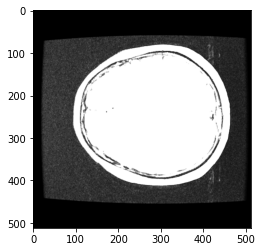

In [67]:
plt.imshow(img)

In [53]:
all_files = glob.glob('./tumor_clf_3_type/brainTumorDataPublic_1-766/*.mat')

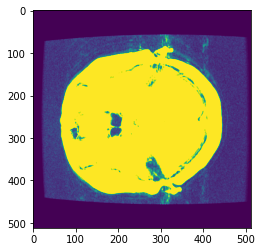

In [91]:
for f in all_files:
    f_data = h5py.File(f, 'r')
    img = Image.fromarray(np.asarray(f_data['cjdata']['image']))
    img = ImageOps.grayscale(img)
    #img.save('test.jpg')
    plt.imshow(img)
    break

## Using automated script

Using https://github.com/guillaumefrd/brain-tumor-mri-dataset

In [92]:
!ls

AnoGAN.ipynb			    oasis3-149-normal-brain.zip
brain_tumor_dataset		    random_dataset
ds000243_R1.0.0			    source.txt
kaggle_brain_tumor_dataset.zip	    test.jpg
normal-brain-multiple-patients.zip  tumor_clf_3_type
normal_brain


In [99]:
!pip install hdf5storage
!pip install opencv-python
!apt-get install ffmpeg libsm6 libxext6 -y

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig fontconfig-config fonts-dejavu-core i965-va-driver libaacs0
  libasound2 libasound2-data libass9 libasyncns0 libavc1394-0 libavcodec57
  libavdevice57 libavfilter6 libavformat57 libavresample3 libavutil55
  libbdplus0 libbluray2 libbs2b0 libbsd0 libcaca0 libcairo2 libcdio-cdda2
  libcdio-paranoia2 libcdio17 libchromaprint1 libcroco3 libcrystalhd3
  libdatrie1 libdc1394-22 libdrm-amdgpu1 libdrm-common libdrm-intel1
  libdrm-nouveau2 libdrm-radeon1 libdrm2 libedit2 libegl-mesa0 libegl1 libelf1
  libfftw3-double3 libflac8 libflite1 libfontconfig1 libfribidi0 libgbm1
  libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common libgl1
  lib

Get:99 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpciaccess0 amd64 0.14-1 [17.9 kB]
Get:100 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-intel1 amd64 2.4.101-2~18.04.1 [60.0 kB]
Get:101 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-nouveau2 amd64 2.4.101-2~18.04.1 [16.5 kB]
Get:102 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdrm-radeon1 amd64 2.4.101-2~18.04.1 [21.7 kB]
Get:103 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libllvm10 amd64 1:10.0.0-4ubuntu1~18.04.2 [15.4 MB]
Get:104 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsensors4 amd64 1:3.4.0-4 [28.8 kB]
Get:105 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgl1-mesa-dri amd64 20.0.8-0ubuntu1~18.04.1 [9333 kB]
Get:106 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libglx-mesa0 amd64 20.0.8-0ubuntu1~18.04.1 [139 kB]
Get:107 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libglx0 amd64 1.0.0-2ubuntu2.3 [

Selecting previously unselected package libxxf86vm1:amd64.
Preparing to unpack .../018-libxxf86vm1_1%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86vm1:amd64 (1:1.1.4-1) ...
Selecting previously unselected package libelf1:amd64.
Preparing to unpack .../019-libelf1_0.170-0.4ubuntu0.1_amd64.deb ...
Unpacking libelf1:amd64 (0.170-0.4ubuntu0.1) ...
Selecting previously unselected package libfribidi0:amd64.
Preparing to unpack .../020-libfribidi0_0.19.7-2_amd64.deb ...
Unpacking libfribidi0:amd64 (0.19.7-2) ...
Selecting previously unselected package libicu60:amd64.
Preparing to unpack .../021-libicu60_60.2-3ubuntu3.1_amd64.deb ...
Unpacking libicu60:amd64 (60.2-3ubuntu3.1) ...
Selecting previously unselected package libslang2:amd64.
Preparing to unpack .../022-libslang2_2.3.1a-3ubuntu1_amd64.deb ...
Unpacking libslang2:amd64 (2.3.1a-3ubuntu1) ...
Selecting previously unselected package libxml2:amd64.
Preparing to unpack .../023-libxml2_2.9.4+dfsg1-6.1ubuntu1.3_amd64.deb ...
Unpacking libxml2:am

Selecting previously unselected package libtheora0:amd64.
Preparing to unpack .../066-libtheora0_1.1.1+dfsg.1-14_amd64.deb ...
Unpacking libtheora0:amd64 (1.1.1+dfsg.1-14) ...
Selecting previously unselected package libtwolame0:amd64.
Preparing to unpack .../067-libtwolame0_0.3.13-3_amd64.deb ...
Unpacking libtwolame0:amd64 (0.3.13-3) ...
Selecting previously unselected package libvorbis0a:amd64.
Preparing to unpack .../068-libvorbis0a_1.3.5-4.2_amd64.deb ...
Unpacking libvorbis0a:amd64 (1.3.5-4.2) ...
Selecting previously unselected package libvorbisenc2:amd64.
Preparing to unpack .../069-libvorbisenc2_1.3.5-4.2_amd64.deb ...
Unpacking libvorbisenc2:amd64 (1.3.5-4.2) ...
Selecting previously unselected package libvpx5:amd64.
Preparing to unpack .../070-libvpx5_1.7.0-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libvpx5:amd64 (1.7.0-3ubuntu0.18.04.1) ...
Selecting previously unselected package libwavpack1:amd64.
Preparing to unpack .../071-libwavpack1_5.1.0-2ubuntu1.5_amd64.deb ...
Unpackin

Selecting previously unselected package libxcb-dri3-0:amd64.
Preparing to unpack .../112-libxcb-dri3-0_1.13-2~ubuntu18.04_amd64.deb ...
Unpacking libxcb-dri3-0:amd64 (1.13-2~ubuntu18.04) ...
Selecting previously unselected package libxcb-glx0:amd64.
Preparing to unpack .../113-libxcb-glx0_1.13-2~ubuntu18.04_amd64.deb ...
Unpacking libxcb-glx0:amd64 (1.13-2~ubuntu18.04) ...
Selecting previously unselected package libxcb-present0:amd64.
Preparing to unpack .../114-libxcb-present0_1.13-2~ubuntu18.04_amd64.deb ...
Unpacking libxcb-present0:amd64 (1.13-2~ubuntu18.04) ...
Selecting previously unselected package libxcb-sync1:amd64.
Preparing to unpack .../115-libxcb-sync1_1.13-2~ubuntu18.04_amd64.deb ...
Unpacking libxcb-sync1:amd64 (1.13-2~ubuntu18.04) ...
Selecting previously unselected package libxdamage1:amd64.
Preparing to unpack .../116-libxdamage1_1%3a1.1.4-3_amd64.deb ...
Unpacking libxdamage1:amd64 (1:1.1.4-3) ...
Selecting previously unselected package libxshmfence1:amd64.
Preparing

Selecting previously unselected package libaacs0:amd64.
Preparing to unpack .../157-libaacs0_0.9.0-1_amd64.deb ...
Unpacking libaacs0:amd64 (0.9.0-1) ...
Selecting previously unselected package libbdplus0:amd64.
Preparing to unpack .../158-libbdplus0_0.1.2-2_amd64.deb ...
Unpacking libbdplus0:amd64 (0.1.2-2) ...
Selecting previously unselected package libgdk-pixbuf2.0-bin.
Preparing to unpack .../159-libgdk-pixbuf2.0-bin_2.36.11-2_amd64.deb ...
Unpacking libgdk-pixbuf2.0-bin (2.36.11-2) ...
Selecting previously unselected package librsvg2-common:amd64.
Preparing to unpack .../160-librsvg2-common_2.40.20-2ubuntu0.2_amd64.deb ...
Unpacking librsvg2-common:amd64 (2.40.20-2ubuntu0.2) ...
Selecting previously unselected package mesa-va-drivers:amd64.
Preparing to unpack .../161-mesa-va-drivers_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking mesa-va-drivers:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Selecting previously unselected package mesa-vdpau-drivers:amd64.
Preparing to unpack .../162-mesa-v

Setting up libxcb-shm0:amd64 (1.13-2~ubuntu18.04) ...
Setting up libxcb-shape0:amd64 (1.13-2~ubuntu18.04) ...
Setting up libxrender1:amd64 (1:0.9.10-1) ...
Setting up libegl-mesa0:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up fontconfig (2.12.6-0ubuntu2) ...
Regenerating fonts cache... done.
Setting up libxdamage1:amd64 (1:1.1.4-3) ...
Setting up libxext6:amd64 (2:1.3.3-1) ...
Setting up libxfixes3:amd64 (1:5.0.3-1) ...
Setting up libxss1:amd64 (1:1.2.2-1) ...
Setting up libgdk-pixbuf2.0-0:amd64 (2.36.11-2) ...
Setting up libgdk-pixbuf2.0-bin (2.36.11-2) ...
Setting up libvdpau1:amd64 (1.1.1-3ubuntu1) ...
Setting up libpulse0:amd64 (1:11.1-1ubuntu7.11) ...
Setting up libegl1:amd64 (1.0.0-2ubuntu2.3) ...
Setting up libxcursor1:amd64 (1:1.1.15-1) ...
Setting up va-driver-all:amd64 (2.1.0-3) ...
Setting up libpango-1.0-0:amd64 (1.40.14-1ubuntu0.1) ...
Setting up libwayland-egl1-mesa:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Setting up libxv1:amd64 (2:1.0.11-1) ...
Setting up libxxf86vm1:amd64 

In [101]:
!python3 matlab_to_numpy.py ./random_dataset/

[3064/3064] images loaded: 100.0 %
labels: (3064,)
images: (3064, 512, 512)
masks: (3064, 512, 512)
labels.npy, images.npy, masks.npy saved in .


In [103]:
labels = np.load('./random_dataset/labels.npy')
images = np.load('./random_dataset/images.npy')
masks = np.load('./random_dataset/masks.npy')

print(labels.shape)
print(images.shape)
print(masks.shape)

(3064,)
(3064, 512, 512)
(3064, 512, 512)


In [106]:
integer_to_class = {'1': 'meningioma (1)', '2': 'glioma (2)', '3': 'pituitary tumor (3)'}

number of meningioma (1): 708
number of glioma (2): 1426
number of pituitary tumor (3): 930


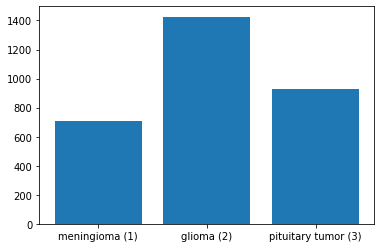

In [107]:
classes, counts = np.unique(labels, return_counts=True)
plt.bar(classes, counts, 
        tick_label=['meningioma (1)', 'glioma (2)', 'pituitary tumor (3)'])

for i, idx in enumerate(classes):
    print('number of {}: {}'.format(integer_to_class[str(idx)], counts[i]))

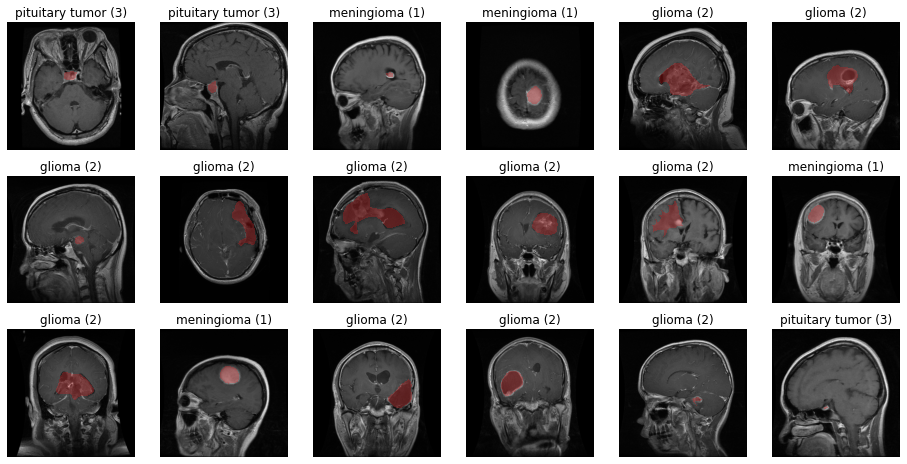

In [108]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow(images[idx], cmap='gray')
    
    # set black pixel as transparent for the mask
    mask = np.ma.masked_where(masks[idx] == False, masks[idx])
    plt.imshow(mask, alpha=0.3, cmap='Set1')
    
    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')

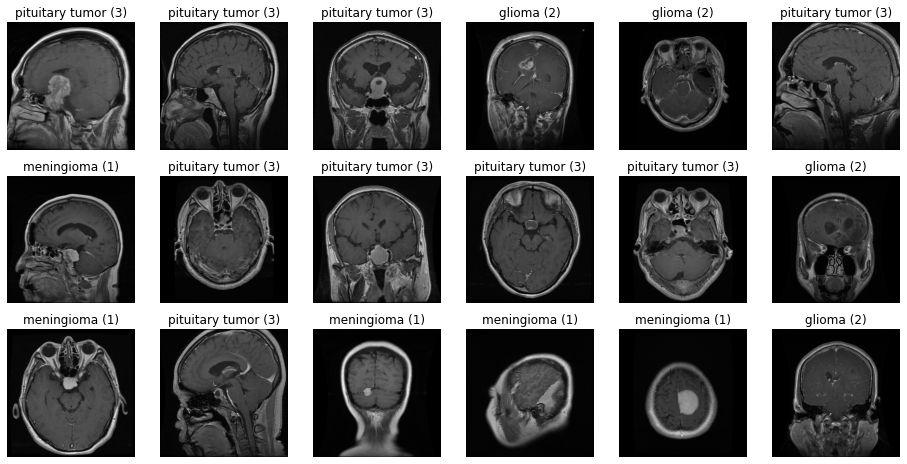

In [109]:
plt.figure(figsize=(16, 8))
for i, idx in enumerate(np.random.randint(images.shape[0], size=18), start=1):
    plt.subplot(3, 6, i)
    plt.imshow(images[idx], cmap='gray')
    
    # set black pixel as transparent for the mask
    #mask = np.ma.masked_where(masks[idx] == False, masks[idx])
    #plt.imshow(mask, alpha=0.3, cmap='Set1')
    
    plt.title(integer_to_class[str(labels[idx])])
    plt.axis('off')

In [110]:
images.shape[0]

3064

In [128]:
import cv2

In [133]:
for i in range(images.shape[0]):
    im = Image.fromarray(images[i])
    im.save("./random_dataset/images/"+str(i)+".png")
    break